


# Video Game Sales Analysis

This dataset contains a list of video games with sales greater than 100,000 copies. 
Fields include

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.





In [ ]:
library(tidyverse)
library(dplyr)
library(ggplot2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
vgsales <- read.csv("vgsales.csv", stringsAsFactors = FALSE)

In [ ]:
head(vgsales,n=10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [ ]:
dim(vgsales)

[1] 16598    11

In [ ]:
vg_sales_cleaned1<-filter(vgsales, Year != "N/A")%>% select(-Rank) %>% mutate(Year = as.numeric(Year))
dim(vg_sales_cleaned1)


[1] 16327    10

In [ ]:
head(vg_sales_cleaned1)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [ ]:
vg_sales_cleaned1 %>%
  count(platforms = n_distinct(Platform))  %>%
  subset(select = c(platforms)) 

,platforms
,<int>
1,31


In [ ]:
vg_sales_cleaned1 %>%
  count(publishers = n_distinct(Publisher)) %>%
  subset(select = c(publishers))

,publishers
,<int>
1,577


In [ ]:
summary(vg_sales_cleaned1)

     Name             Platform              Year         Genre          
 Length:16327       Length:16327       Min.   :1980   Length:16327      
 Class :character   Class :character   1st Qu.:2003   Class :character  
 Mode  :character   Mode  :character   Median :2007   Mode  :character  
                                       Mean   :2006                     
                                       3rd Qu.:2010                     
                                       Max.   :2020                     
  Publisher            NA_Sales          EU_Sales          JP_Sales       
 Length:16327       Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.00000  
 Class :character   1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.: 0.00000  
 Mode  :character   Median : 0.0800   Median : 0.0200   Median : 0.00000  
                    Mean   : 0.2654   Mean   : 0.1476   Mean   : 0.07866  
                    3rd Qu.: 0.2400   3rd Qu.: 0.1100   3rd Qu.: 0.04000  
                    Max.   :41.4900   M

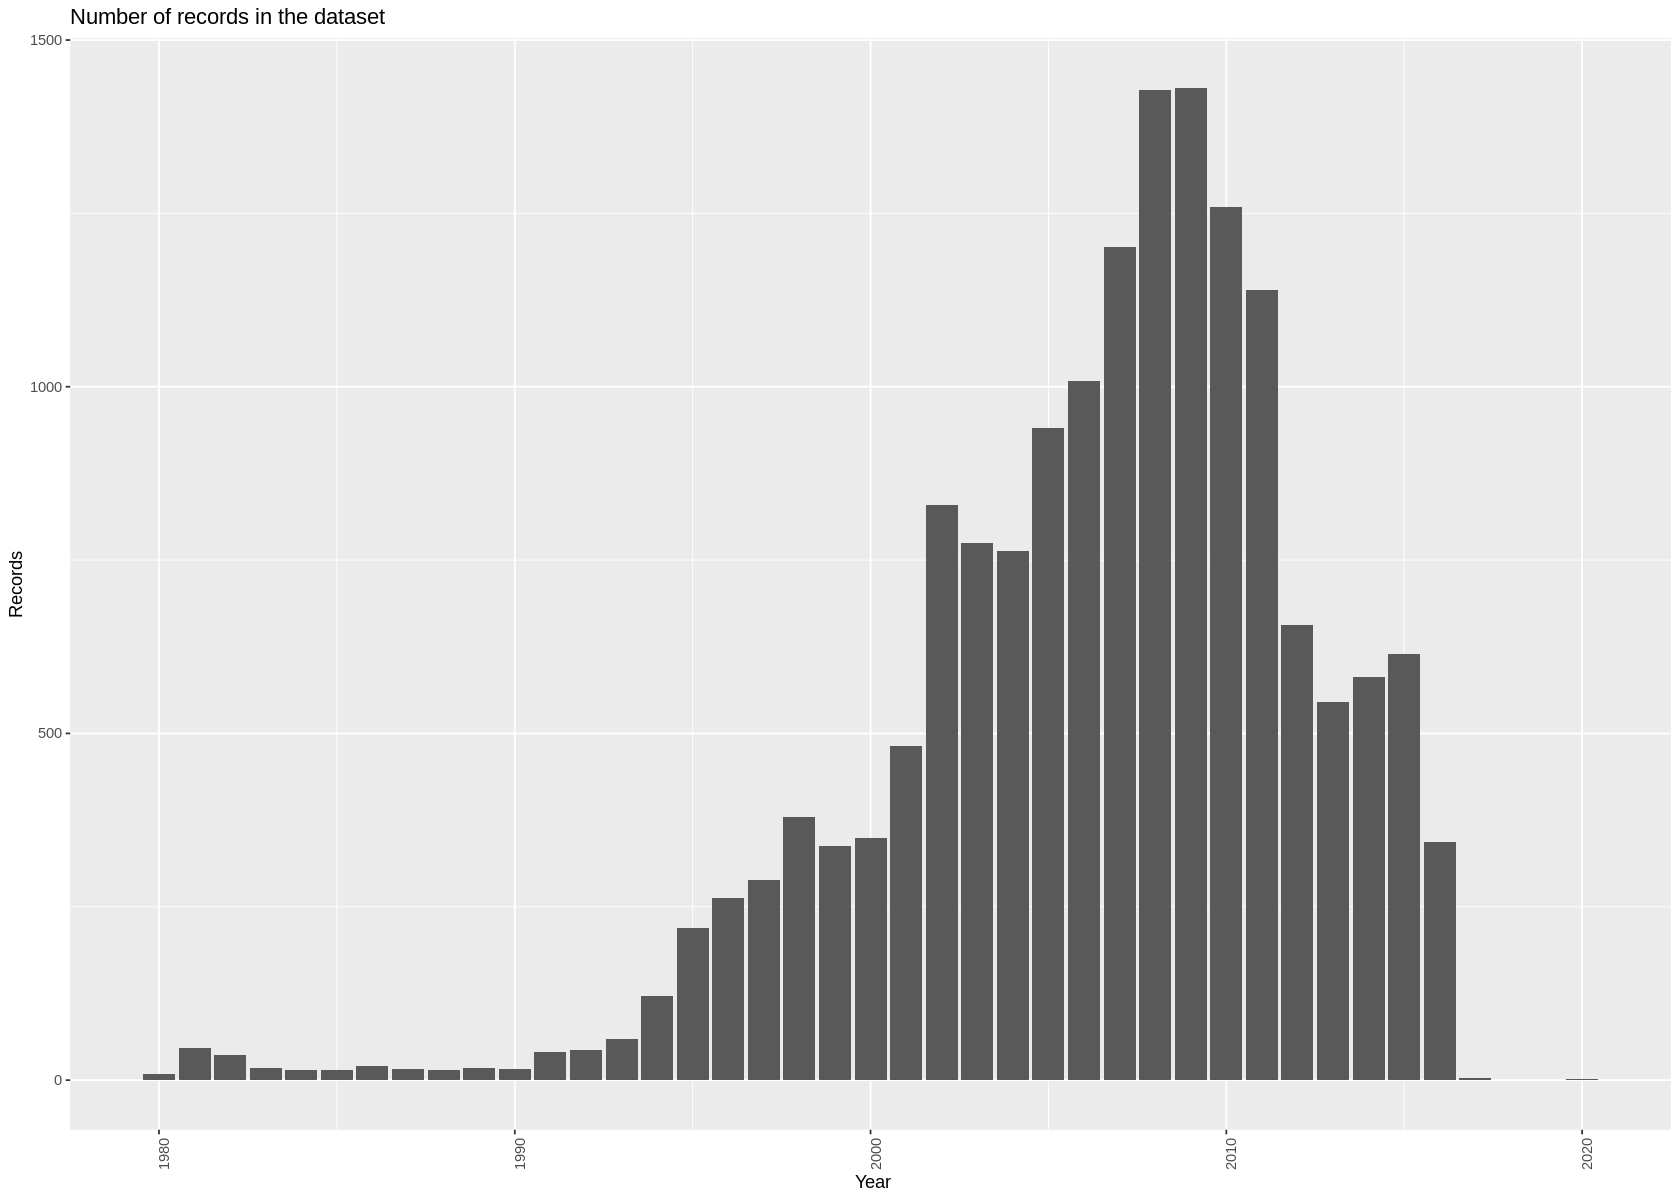

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 10)

ggplot(vg_sales_cleaned1) + geom_bar(aes(x = Year))+xlab(" Year") +
         ylab("Records") +ggtitle("Number of records in the dataset")+theme(axis.text.x=element_text(angle=90, hjust=1))

In [ ]:
vg_sales_cleaned1<-filter(vg_sales_cleaned1, Year<=2016)

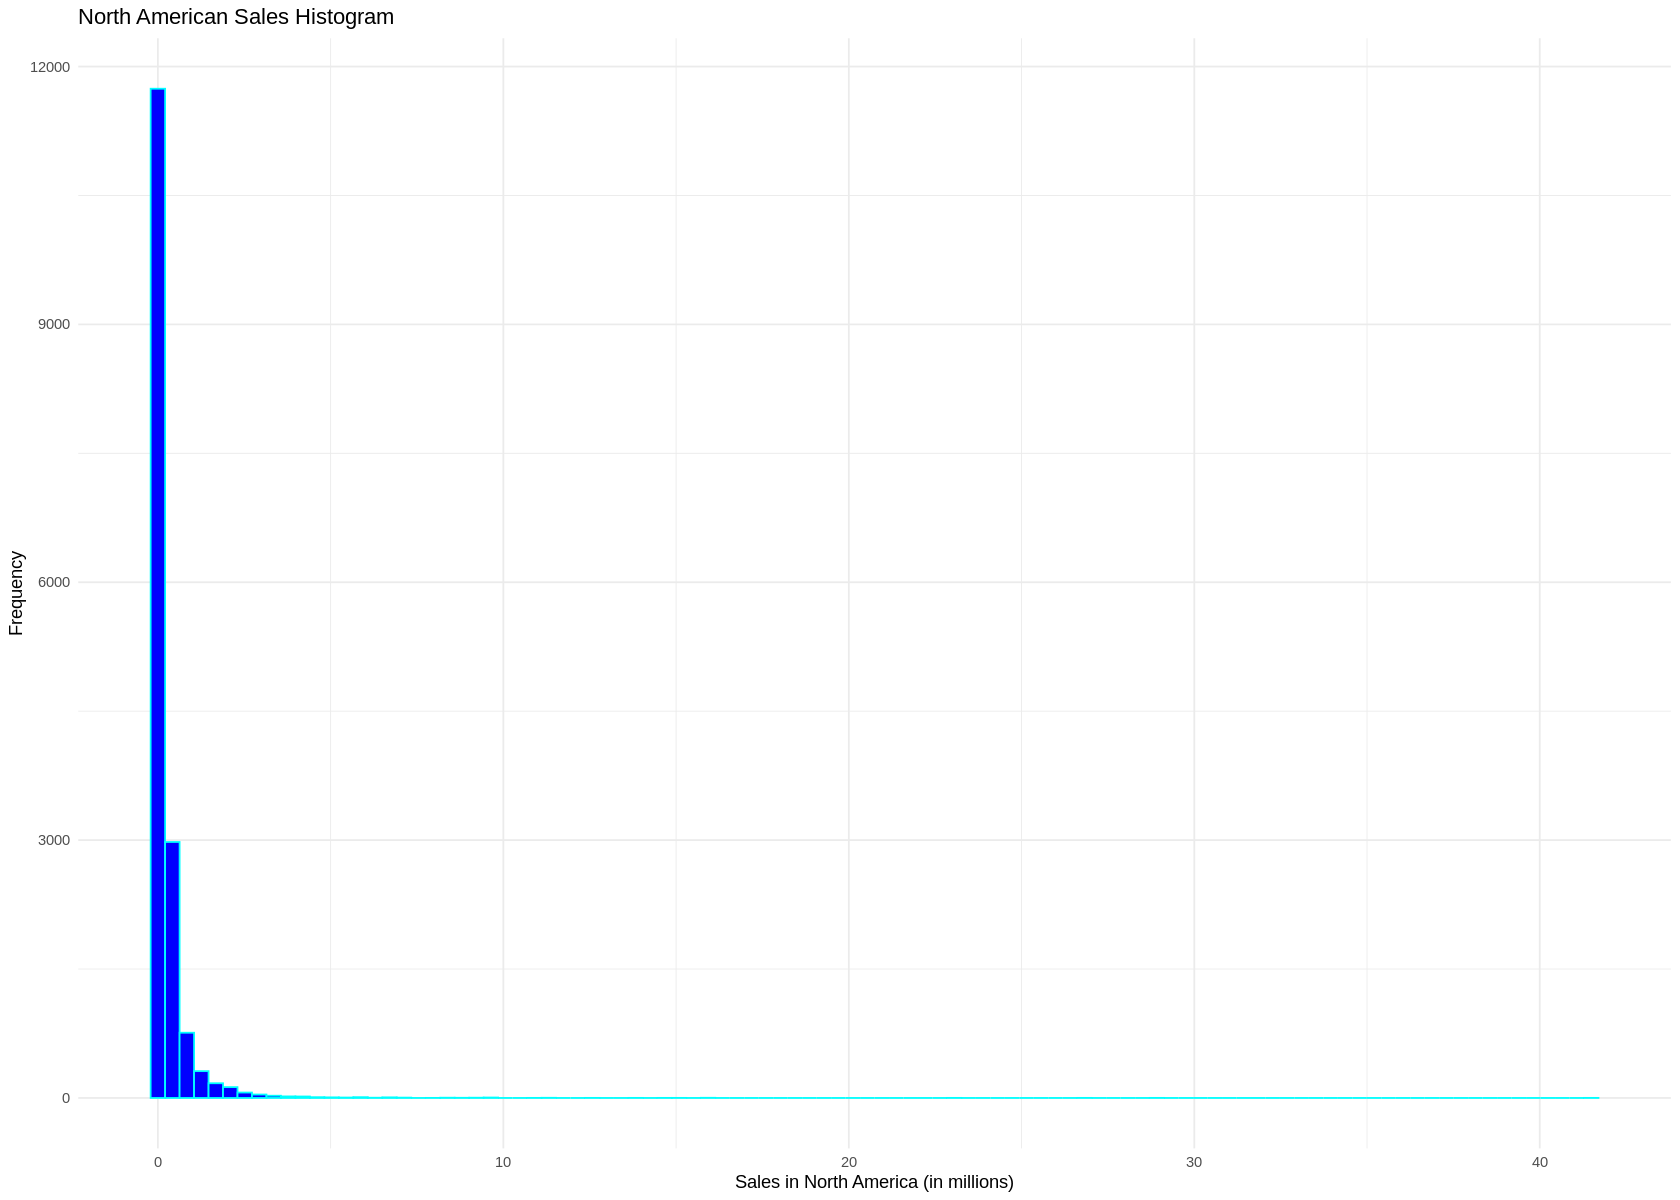

In [ ]:
ggplot(data = vg_sales_cleaned1, mapping = aes(x = NA_Sales)) +
         geom_histogram(bins = 100, fill = "blue", color = "cyan") +
         xlab("Sales in North America (in millions)") +
         ylab("Frequency") +
         ggtitle("North American Sales Histogram") +
         theme_minimal()

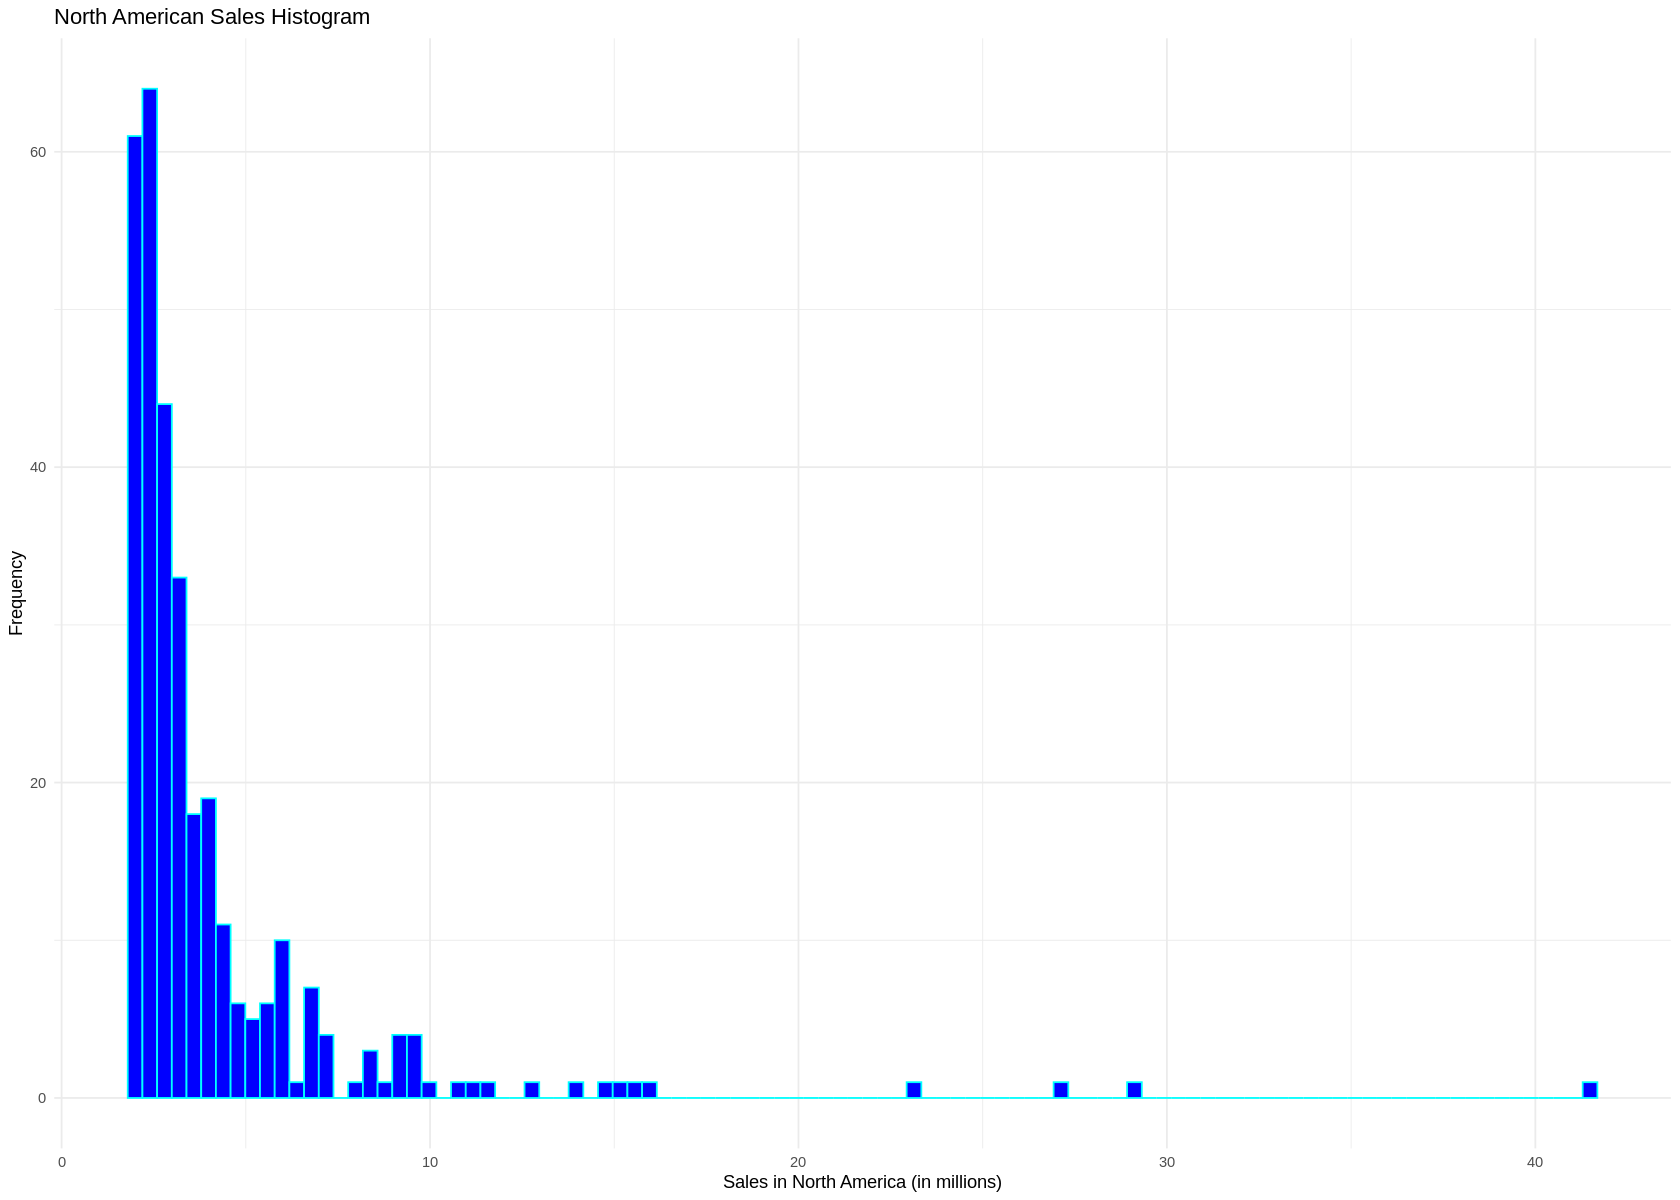

In [ ]:
ggplot(data = filter(vg_sales_cleaned1,NA_Sales>=2), mapping = aes(x = NA_Sales)) +
         geom_histogram(bins = 100, fill = "blue", color = "cyan") +
         xlab("Sales in North America (in millions)") +
         ylab("Frequency") +
         ggtitle("North American Sales Histogram") +
         theme_minimal()

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



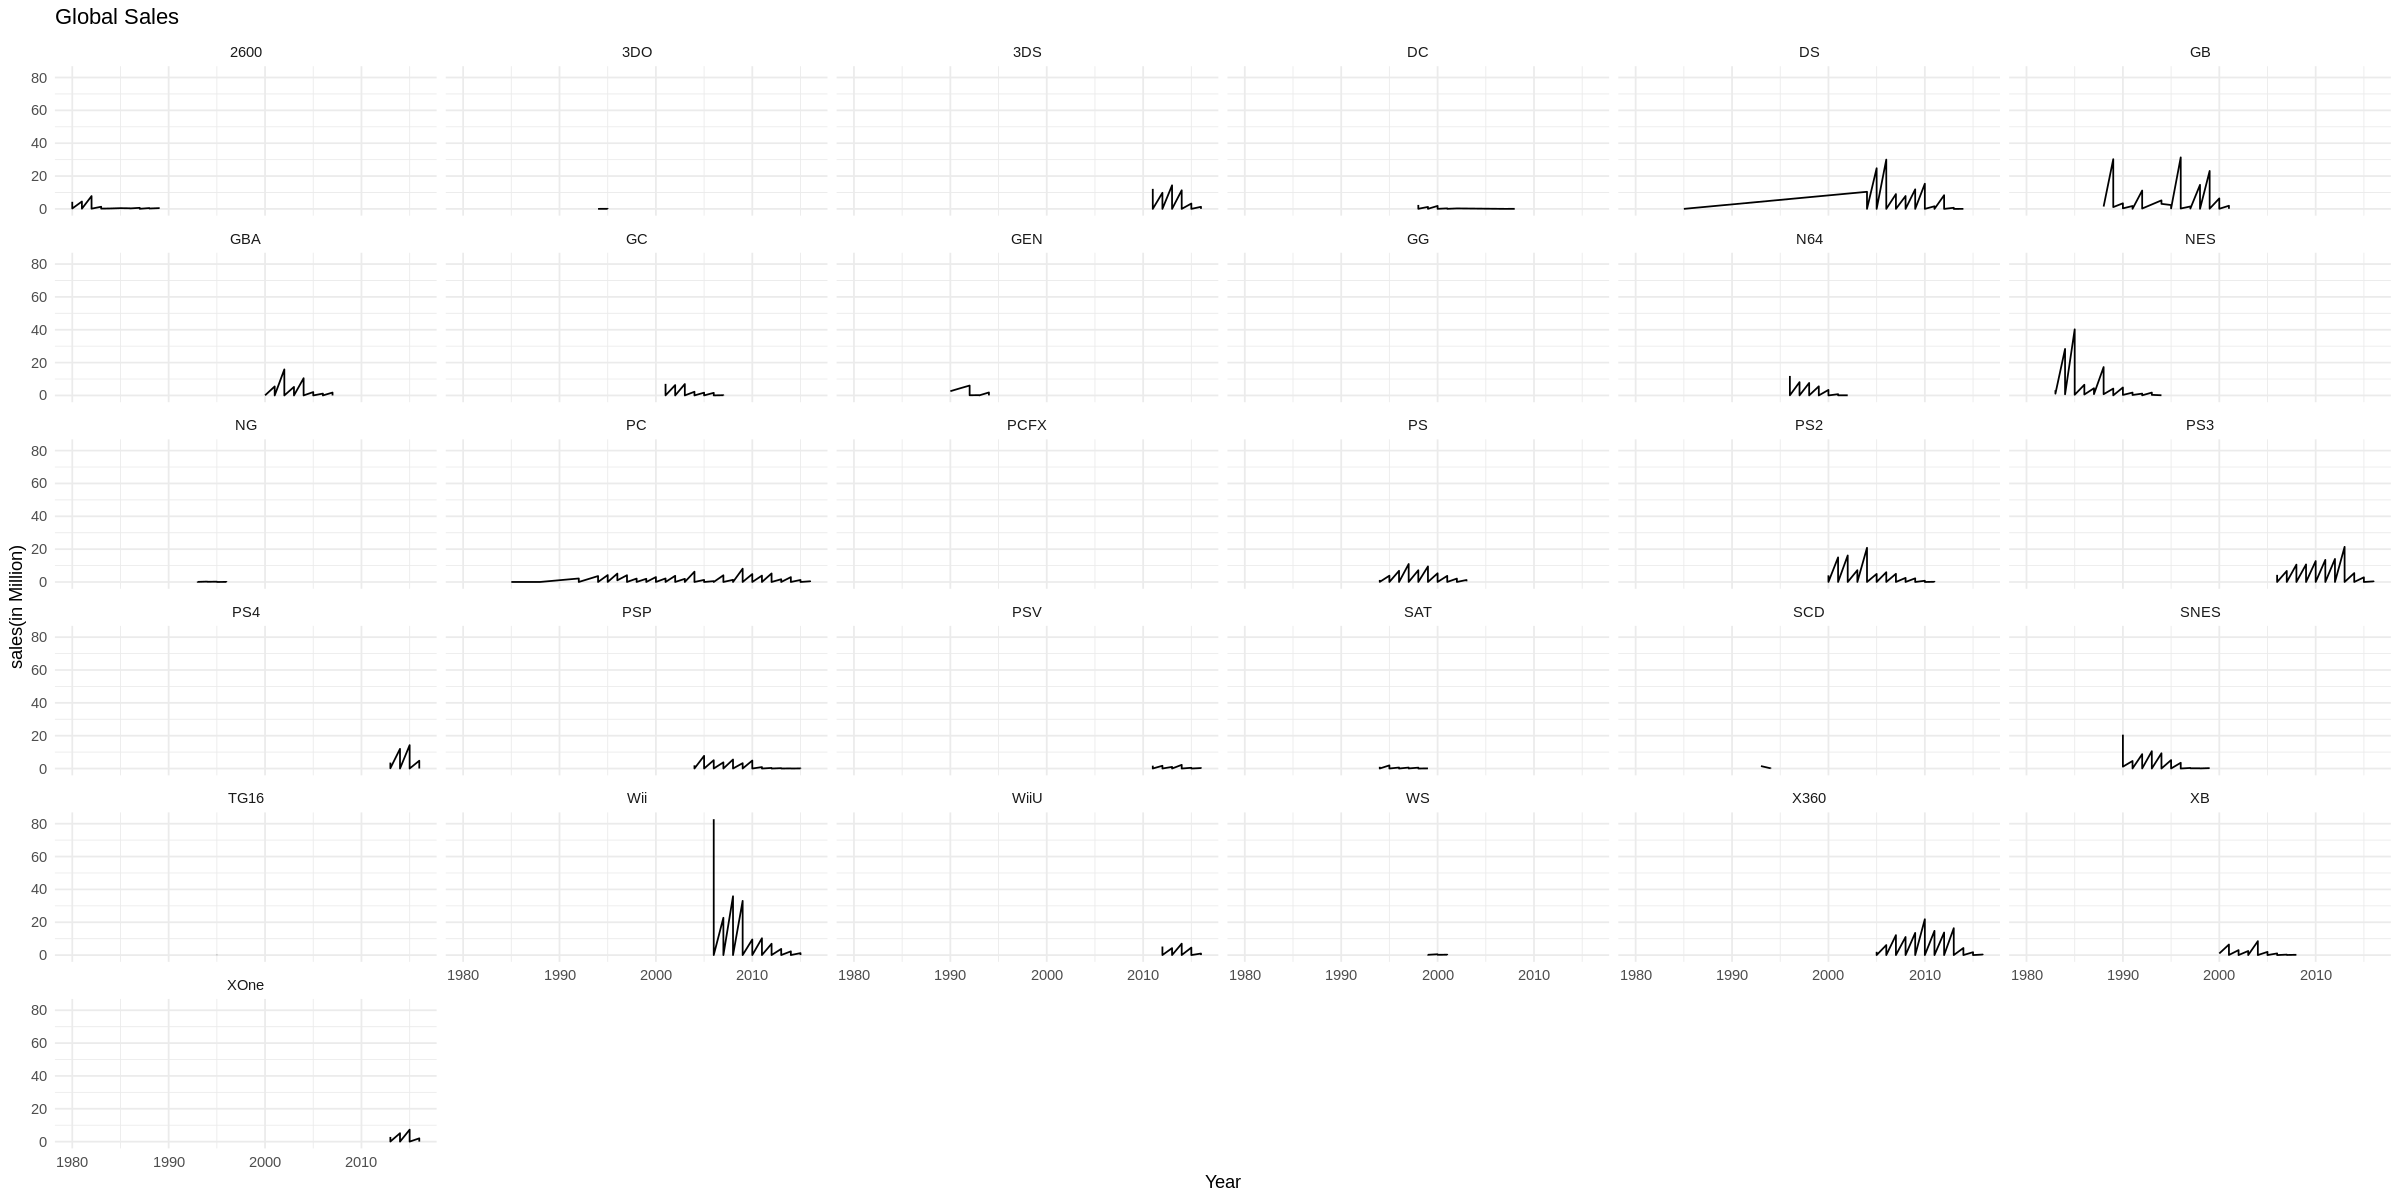

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(data = vg_sales_cleaned1, mapping = aes(x = Year,y=Global_Sales)) +
         geom_line() +
         xlab("Year") +
         ylab("sales(in Million)") +
         ggtitle("Global Sales") +
         theme_minimal()+facet_wrap(~Platform)

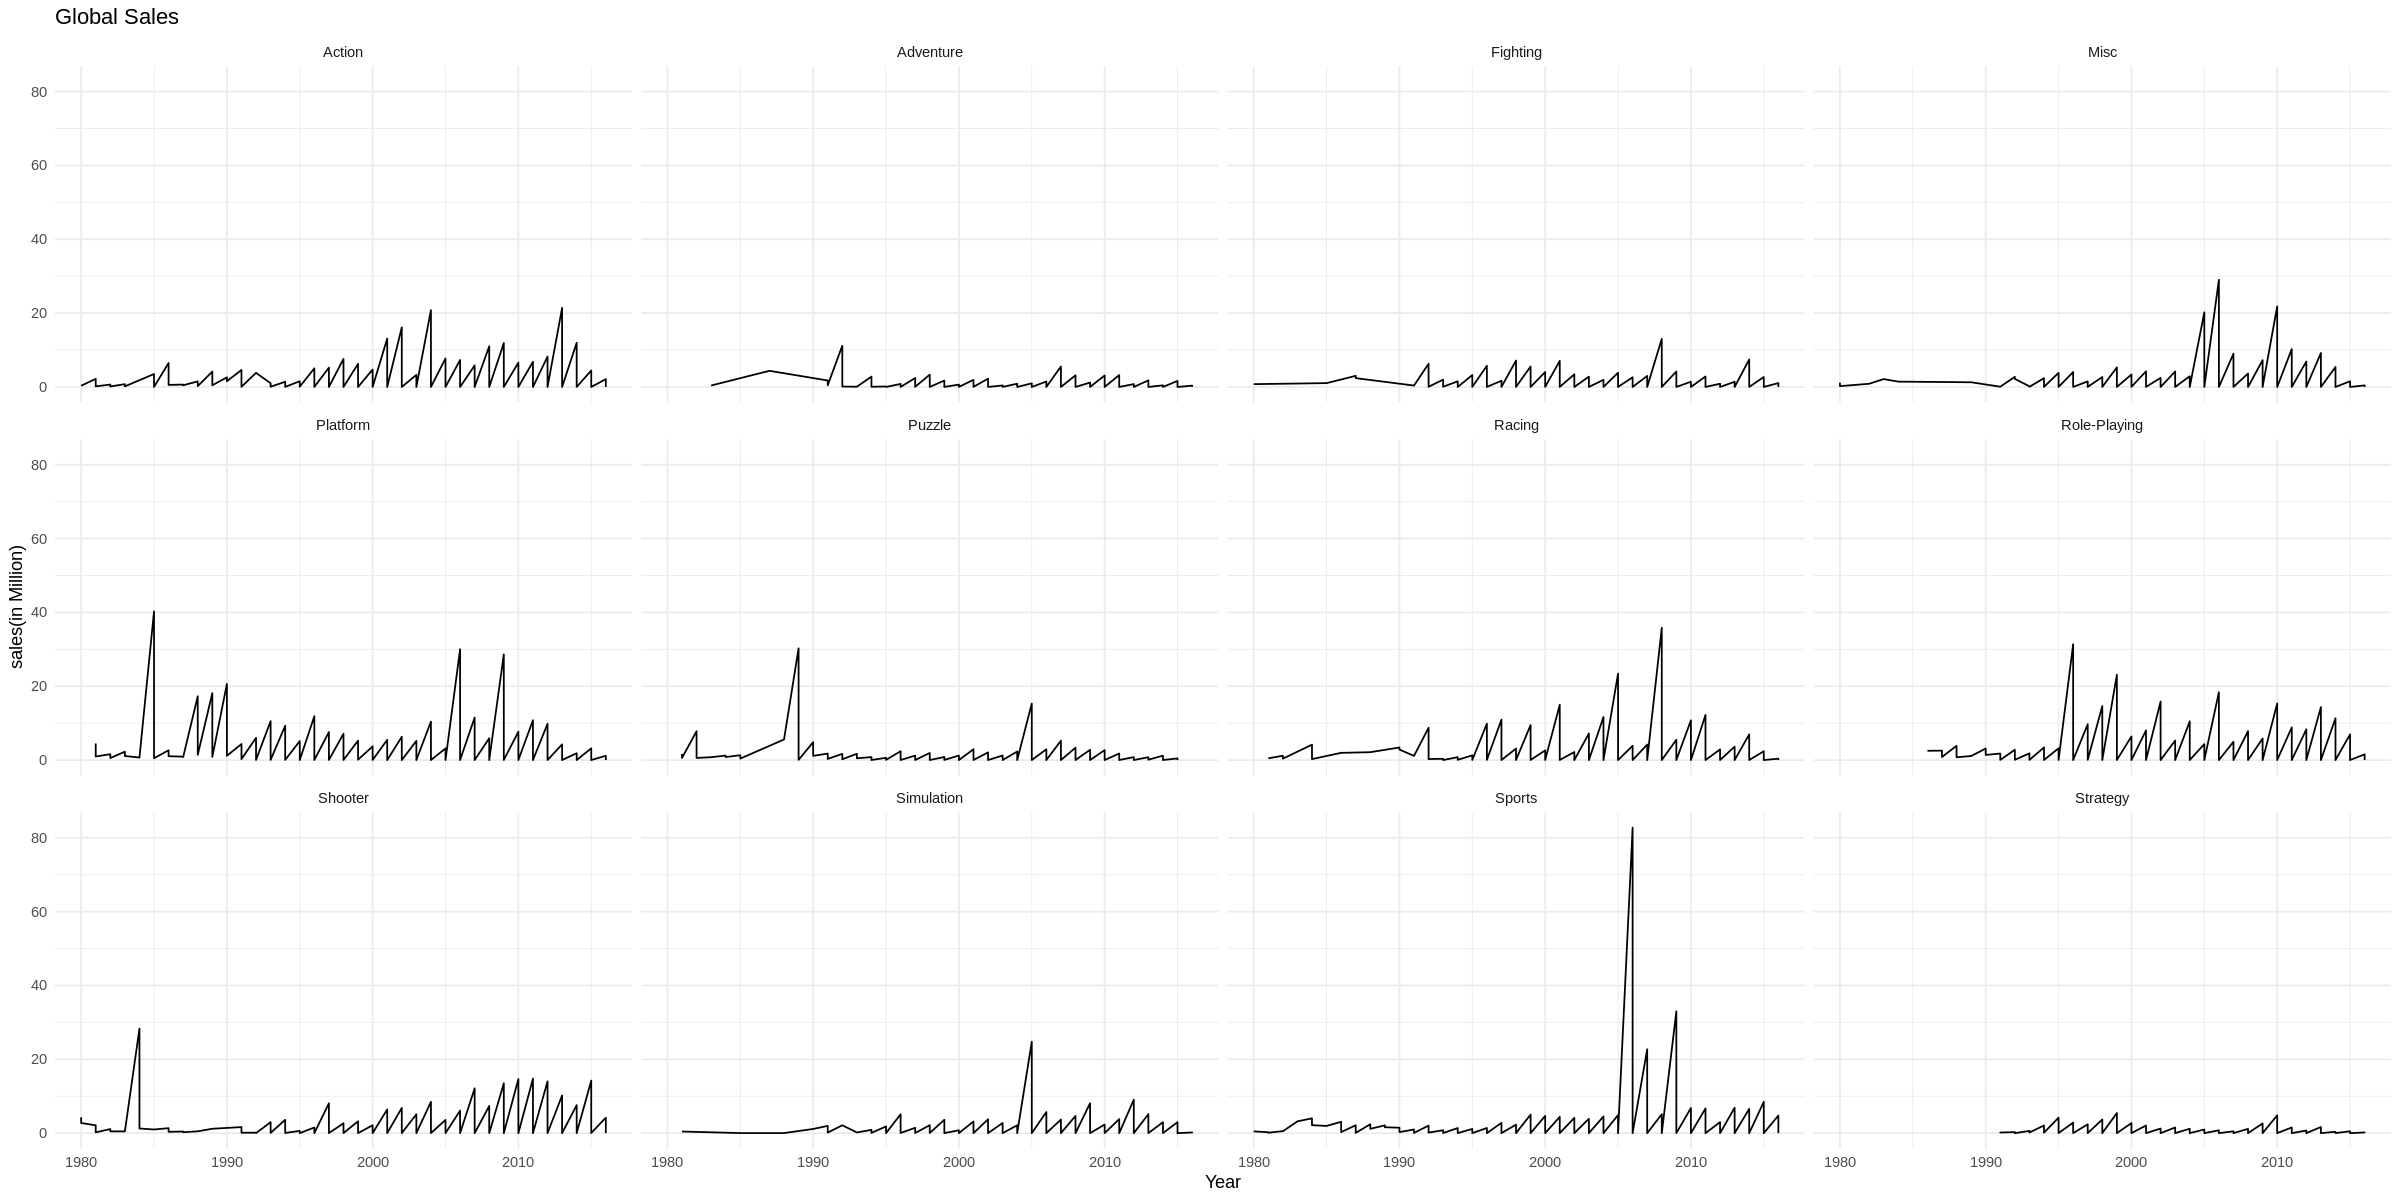

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(data = vg_sales_cleaned1, mapping = aes(x = Year,y=Global_Sales)) +
         geom_line() +
         xlab("Year") +
         ylab("sales(in Million)") +
         ggtitle("Global Sales") +
         theme_minimal()+facet_wrap(~Genre)

In [ ]:
vgsales_NA_by_platform<- vg_sales_cleaned1%>% group_by(Platform) %>% summarise(total_sales = sum(NA_Sales))%>% arrange(desc(total_sales))
head(vgsales_NA_by_platform,n=20)

Platform,total_sales
<chr>,<dbl>
X360,594.33
PS2,572.92
Wii,497.37
PS3,388.90
DS,388.29
PS,334.71
GBA,184.12
XB,182.06
N64,138.91


In [ ]:
vgsales_NA_by_name<- vg_sales_cleaned1%>% group_by(Name) %>% summarise(total_sales = sum(Global_Sales))%>% arrange(desc(total_sales))
head(vgsales_NA_by_name)

Name,total_sales
<chr>,<dbl>
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00


In [ ]:
vgsales_NA_by_name<- vg_sales_cleaned1%>% arrange(desc(Global_Sales))
head(vgsales_NA_by_name)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


Selecting by Global_Sales


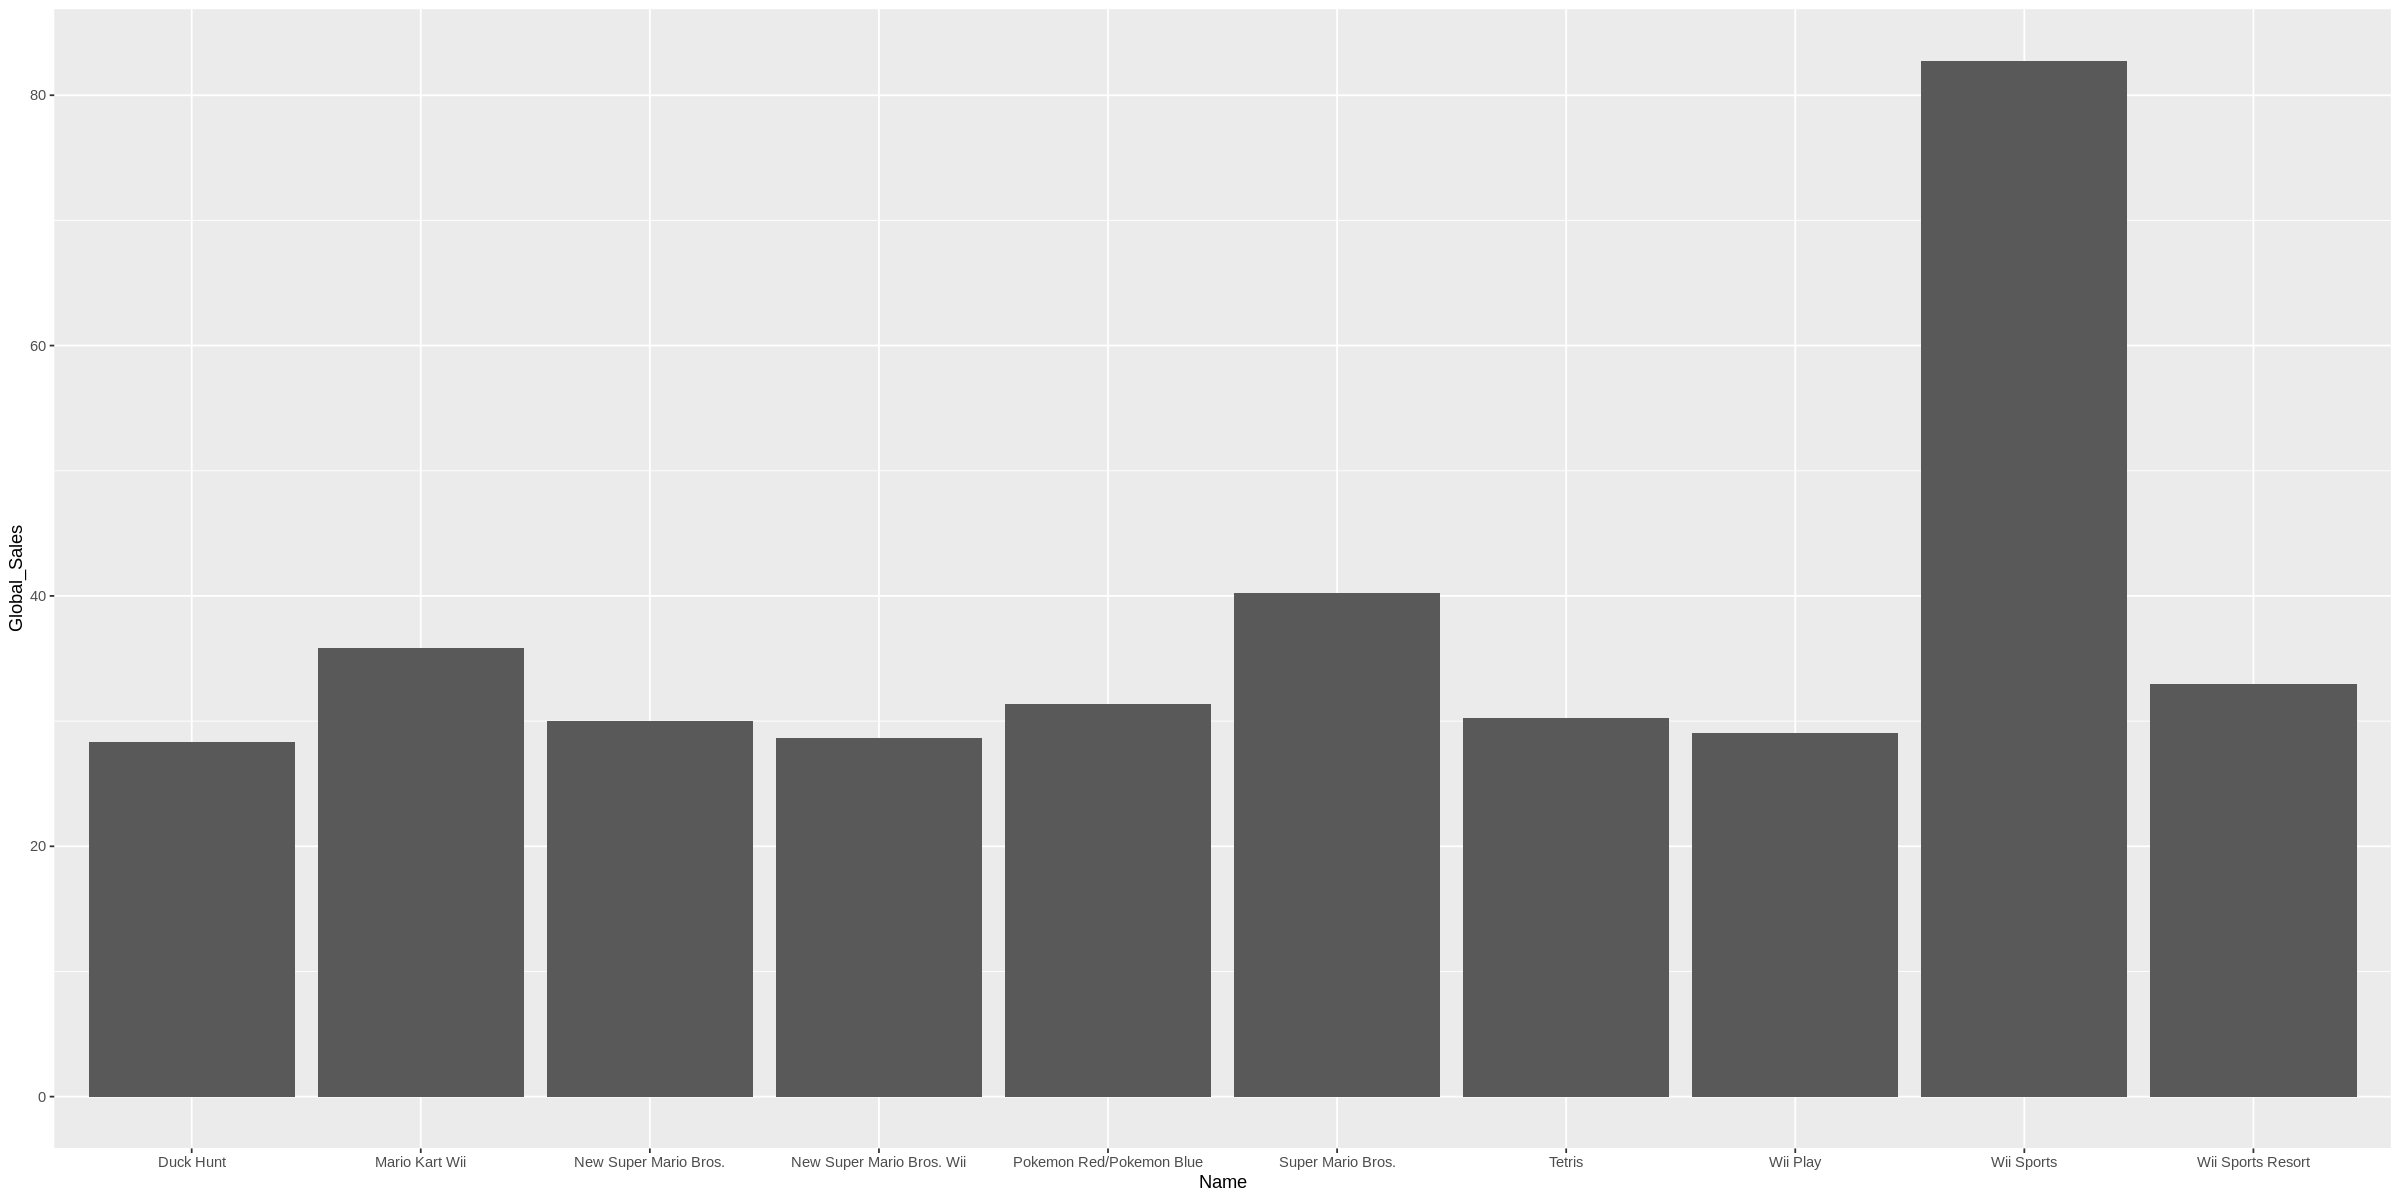

In [ ]:
ggplot(data = top_n(vgsales_NA_by_name,10), mapping = aes(x=Name,y= Global_Sales)) +
         geom_bar(stat = "identity") 

In [ ]:
vgsales_NA_by_publisher<- vg_sales_cleaned1%>% group_by(Publisher) %>% summarise(total_sales = sum(Global_Sales))%>% arrange(desc(total_sales))
head(vgsales_NA_by_publisher)

Publisher,total_sales
<chr>,<dbl>
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.25
Take-Two Interactive,399.30


Selecting by total_sales


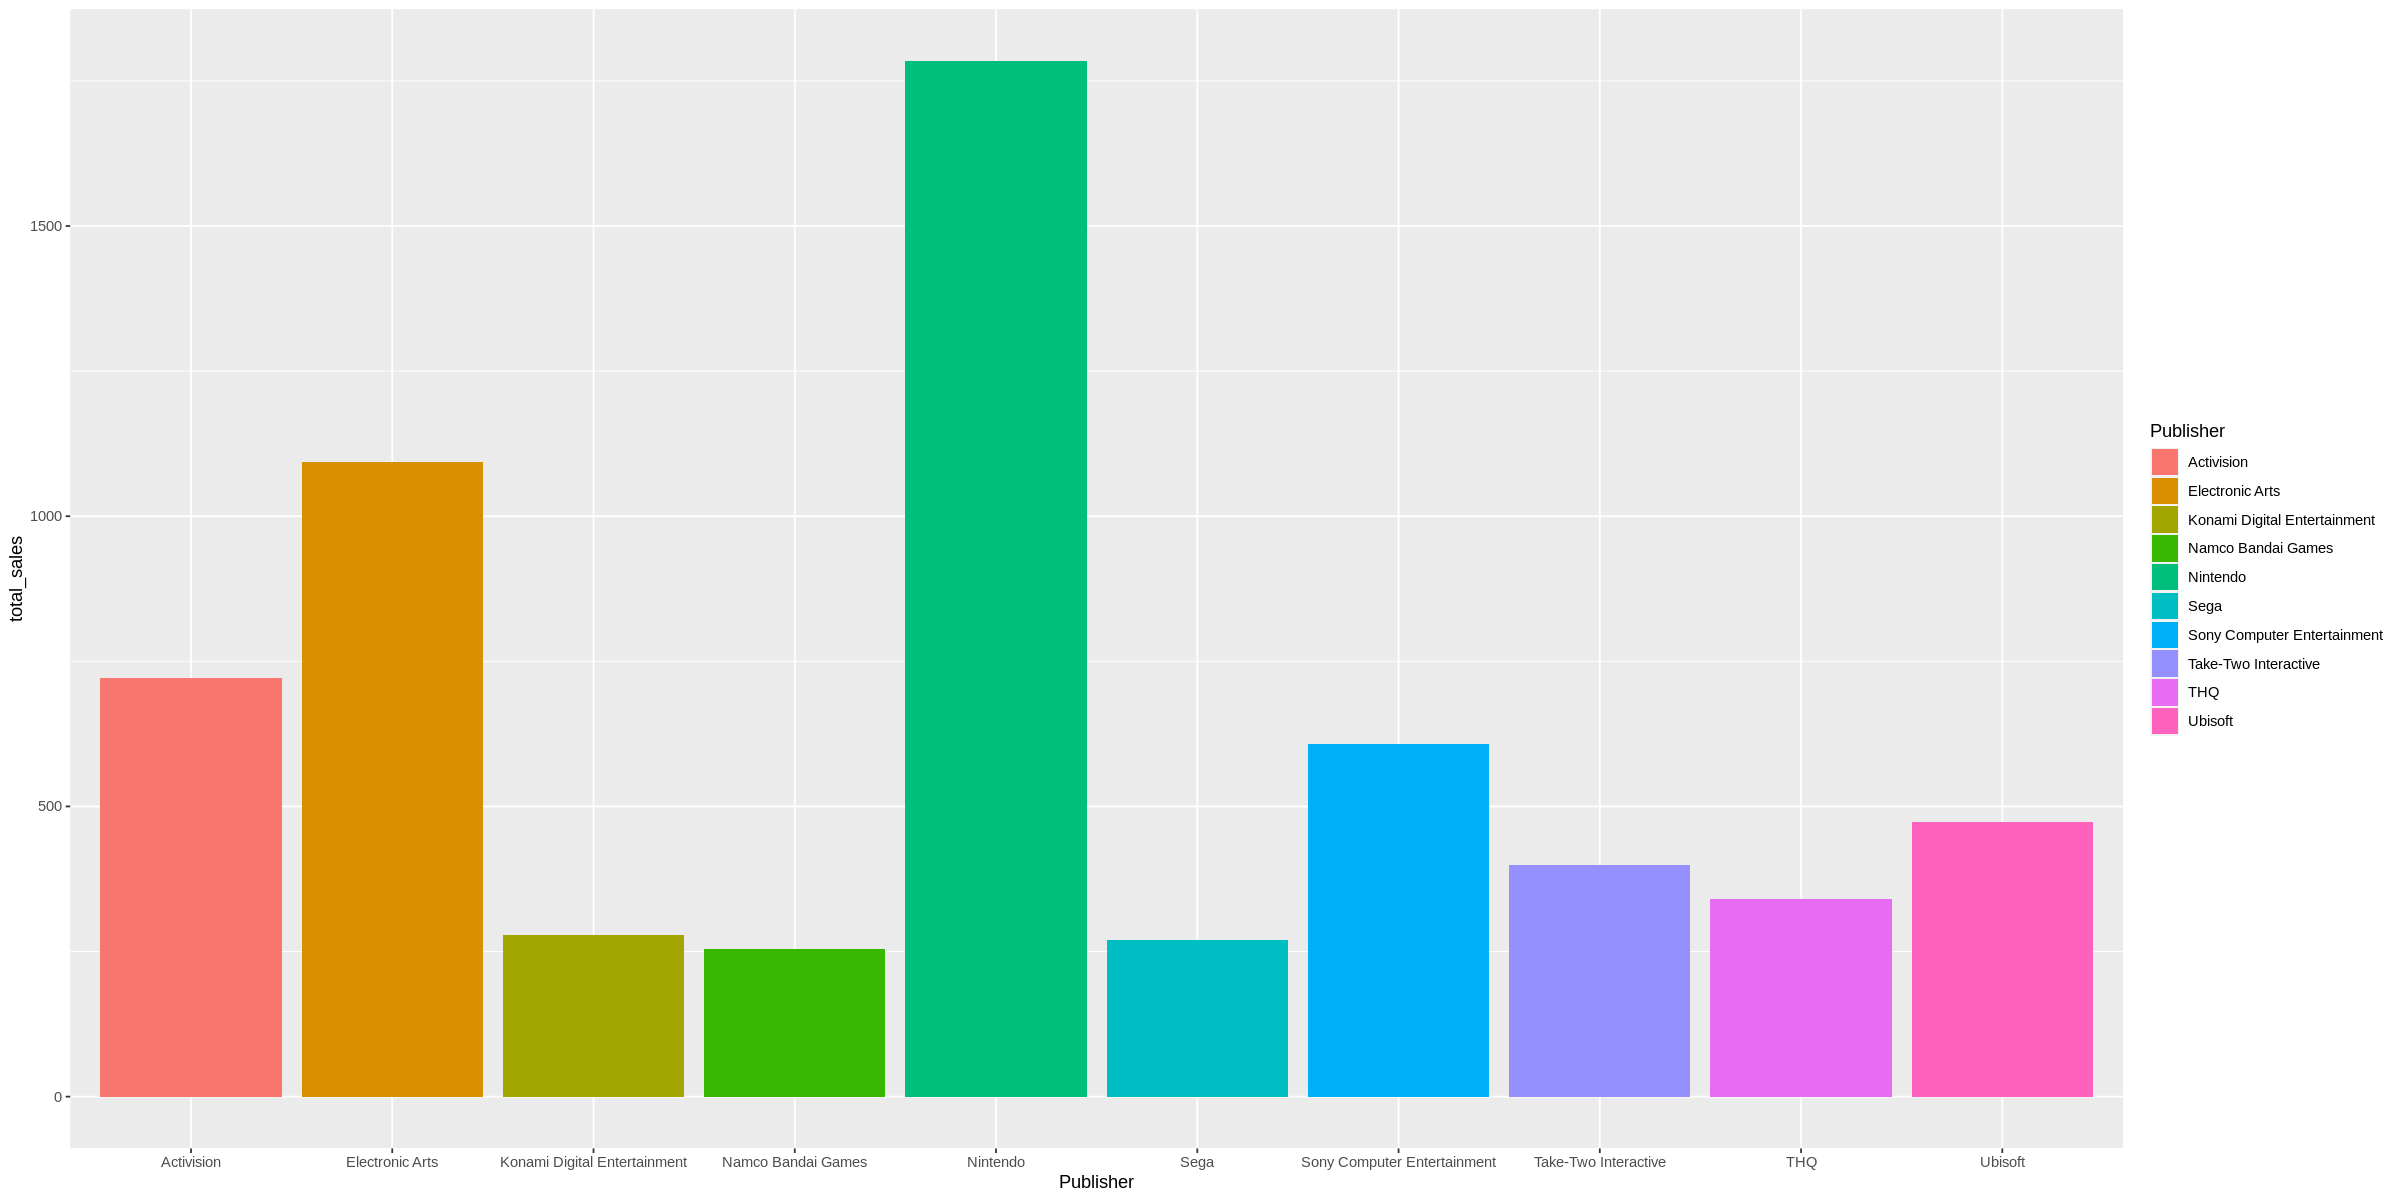

In [ ]:
sales_by_publisher_plot<-ggplot(data = top_n(vgsales_NA_by_publisher,10), mapping = aes(x=Publisher,y= total_sales,fill=Publisher)) +
         geom_bar(stat = "identity") 
   sales_by_publisher_plot      

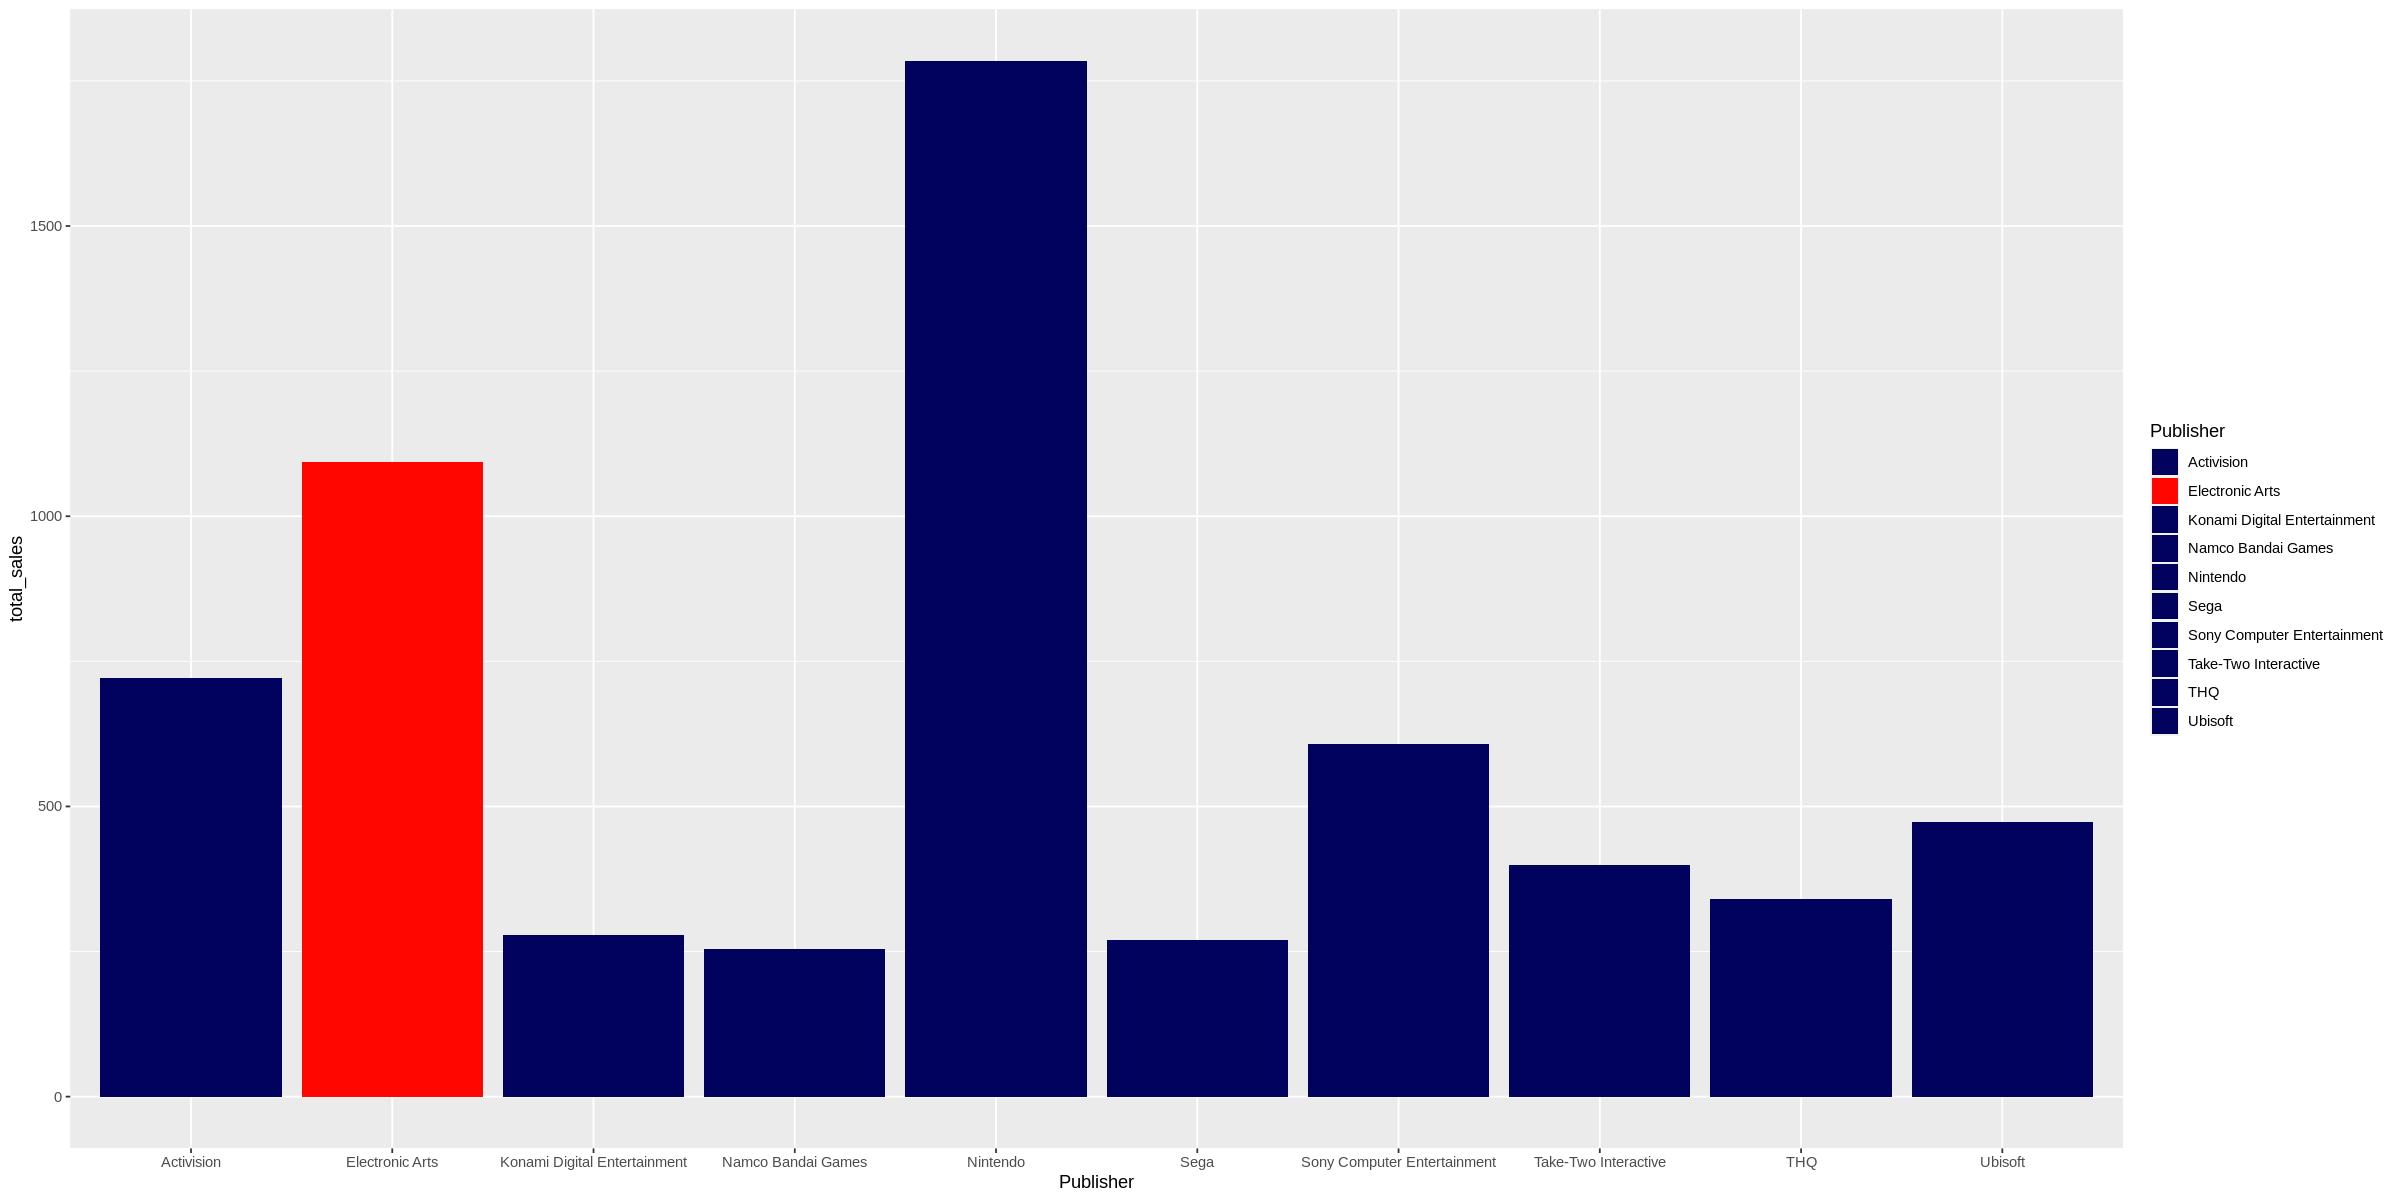

In [ ]:
sales_by_publisher_plot+scale_fill_manual(values = c("#00025d", "#ff0700", "#00025d", "#00025d", "#00025d",
                               "#00025d", "#00025d", "#00025d", "#00025d", "#00025d"))

In [ ]:
sale_by_region<-vg_sales_cleaned1%>% gather(region, sales,
                   c(NA_Sales,EU_Sales,	JP_Sales,	Other_Sales	,Global_Sales))%>%select(Year,region,sales)

head(sale_by_region)

,Year,region,sales
,<dbl>,<chr>,<dbl>
1,2006,NA_Sales,41.49
2,1985,NA_Sales,29.08
3,2008,NA_Sales,15.85
4,2009,NA_Sales,15.75
5,1996,NA_Sales,11.27
6,1989,NA_Sales,23.20


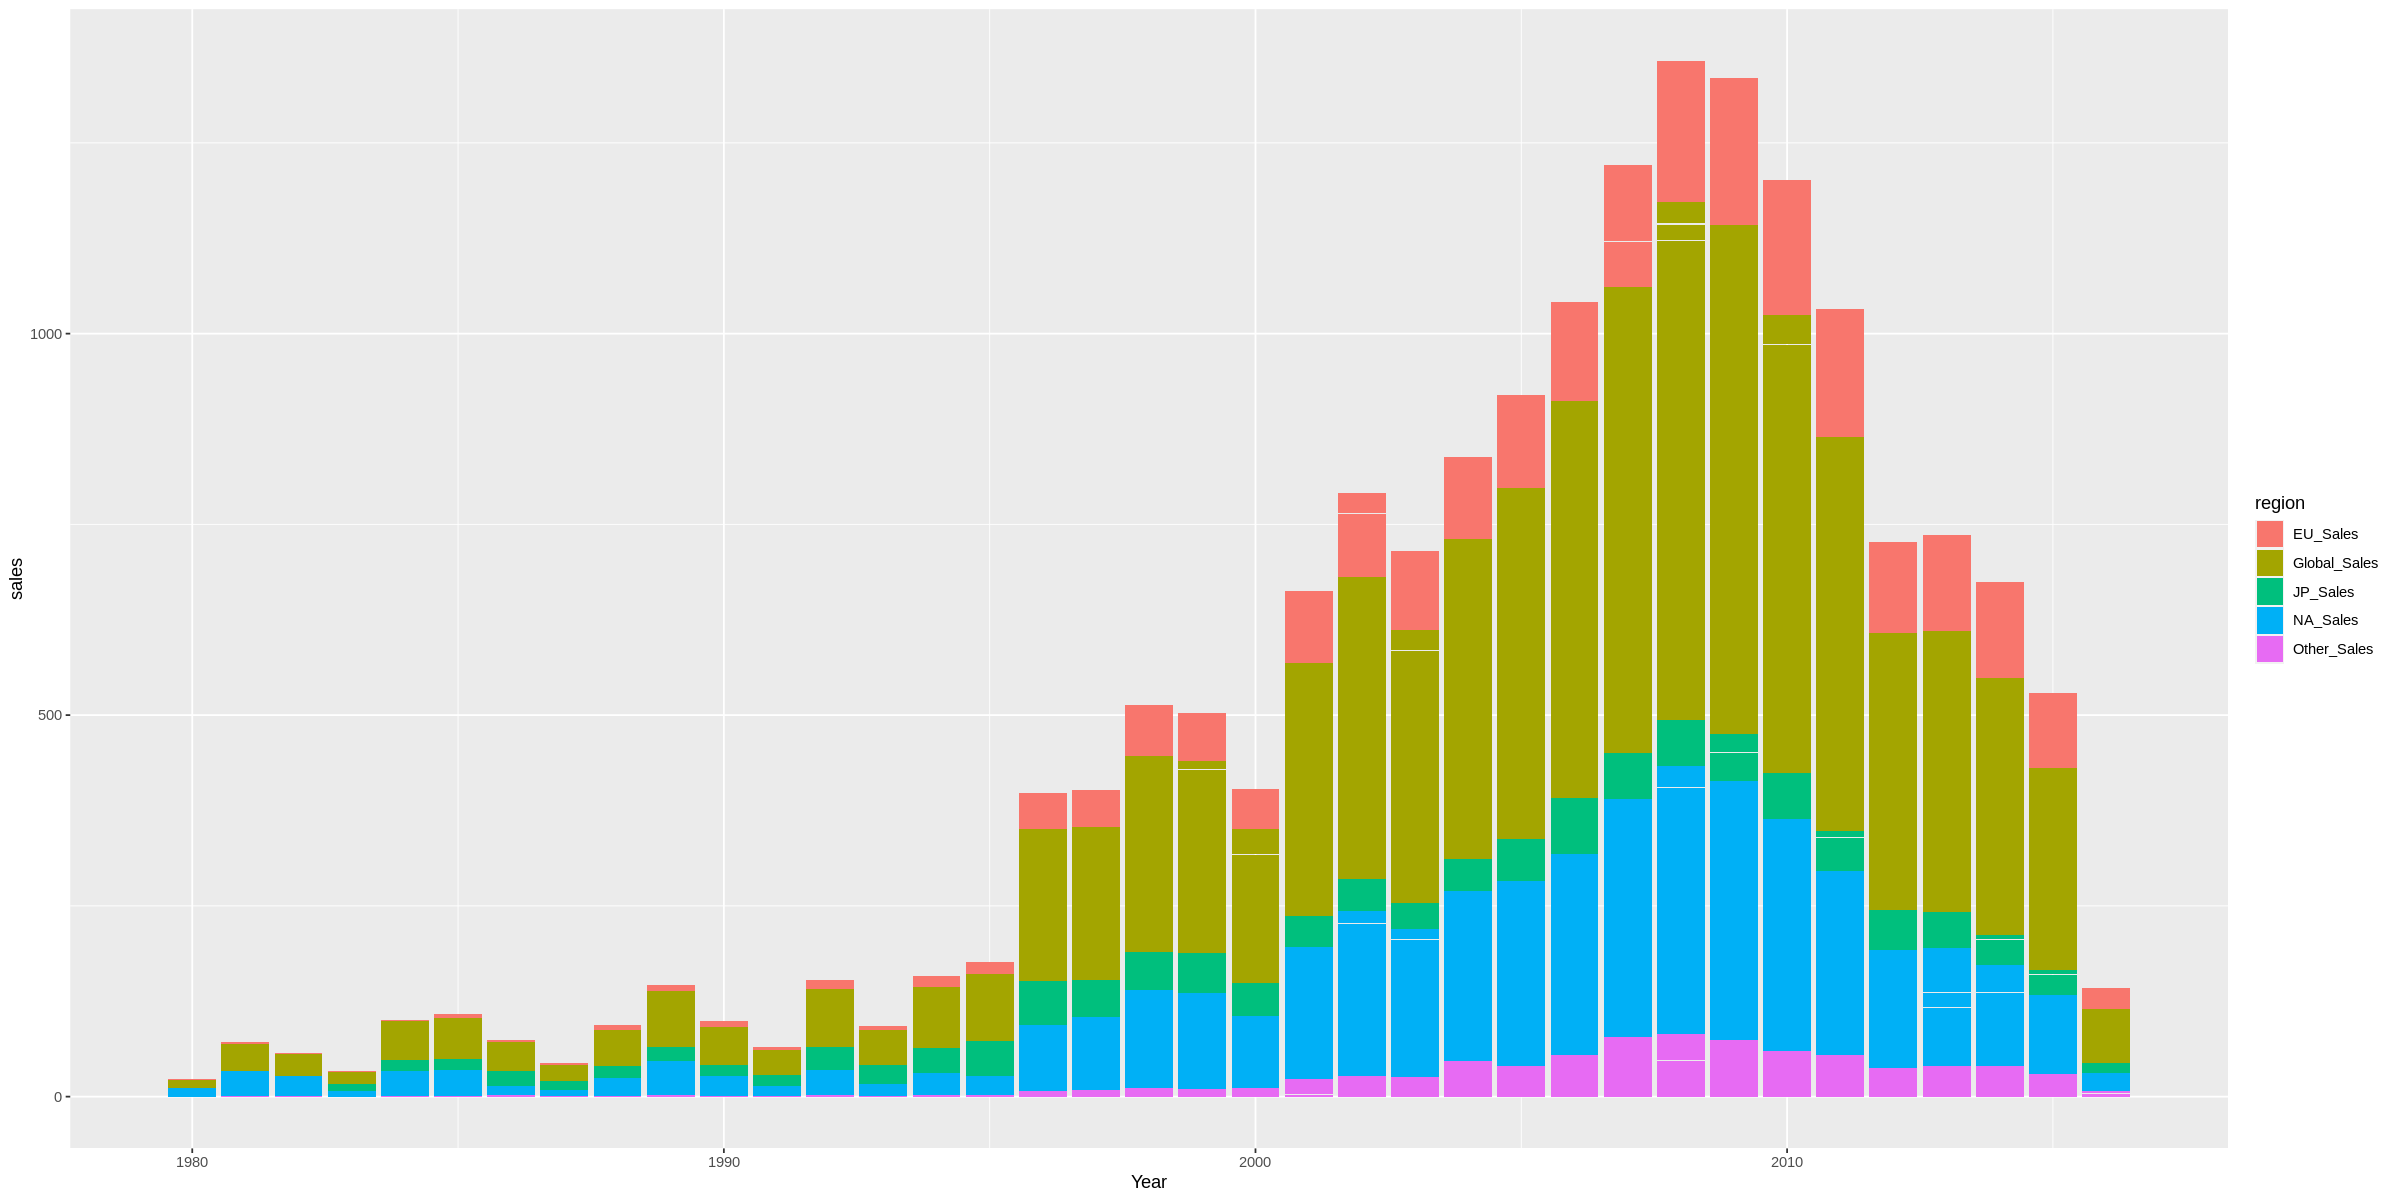

In [ ]:
region_sales_plot<-ggplot(sale_by_region, aes(fill=region, y=sales, x=Year)) + 
    geom_bar(position="stack", stat="identity")
    region_sales_plot

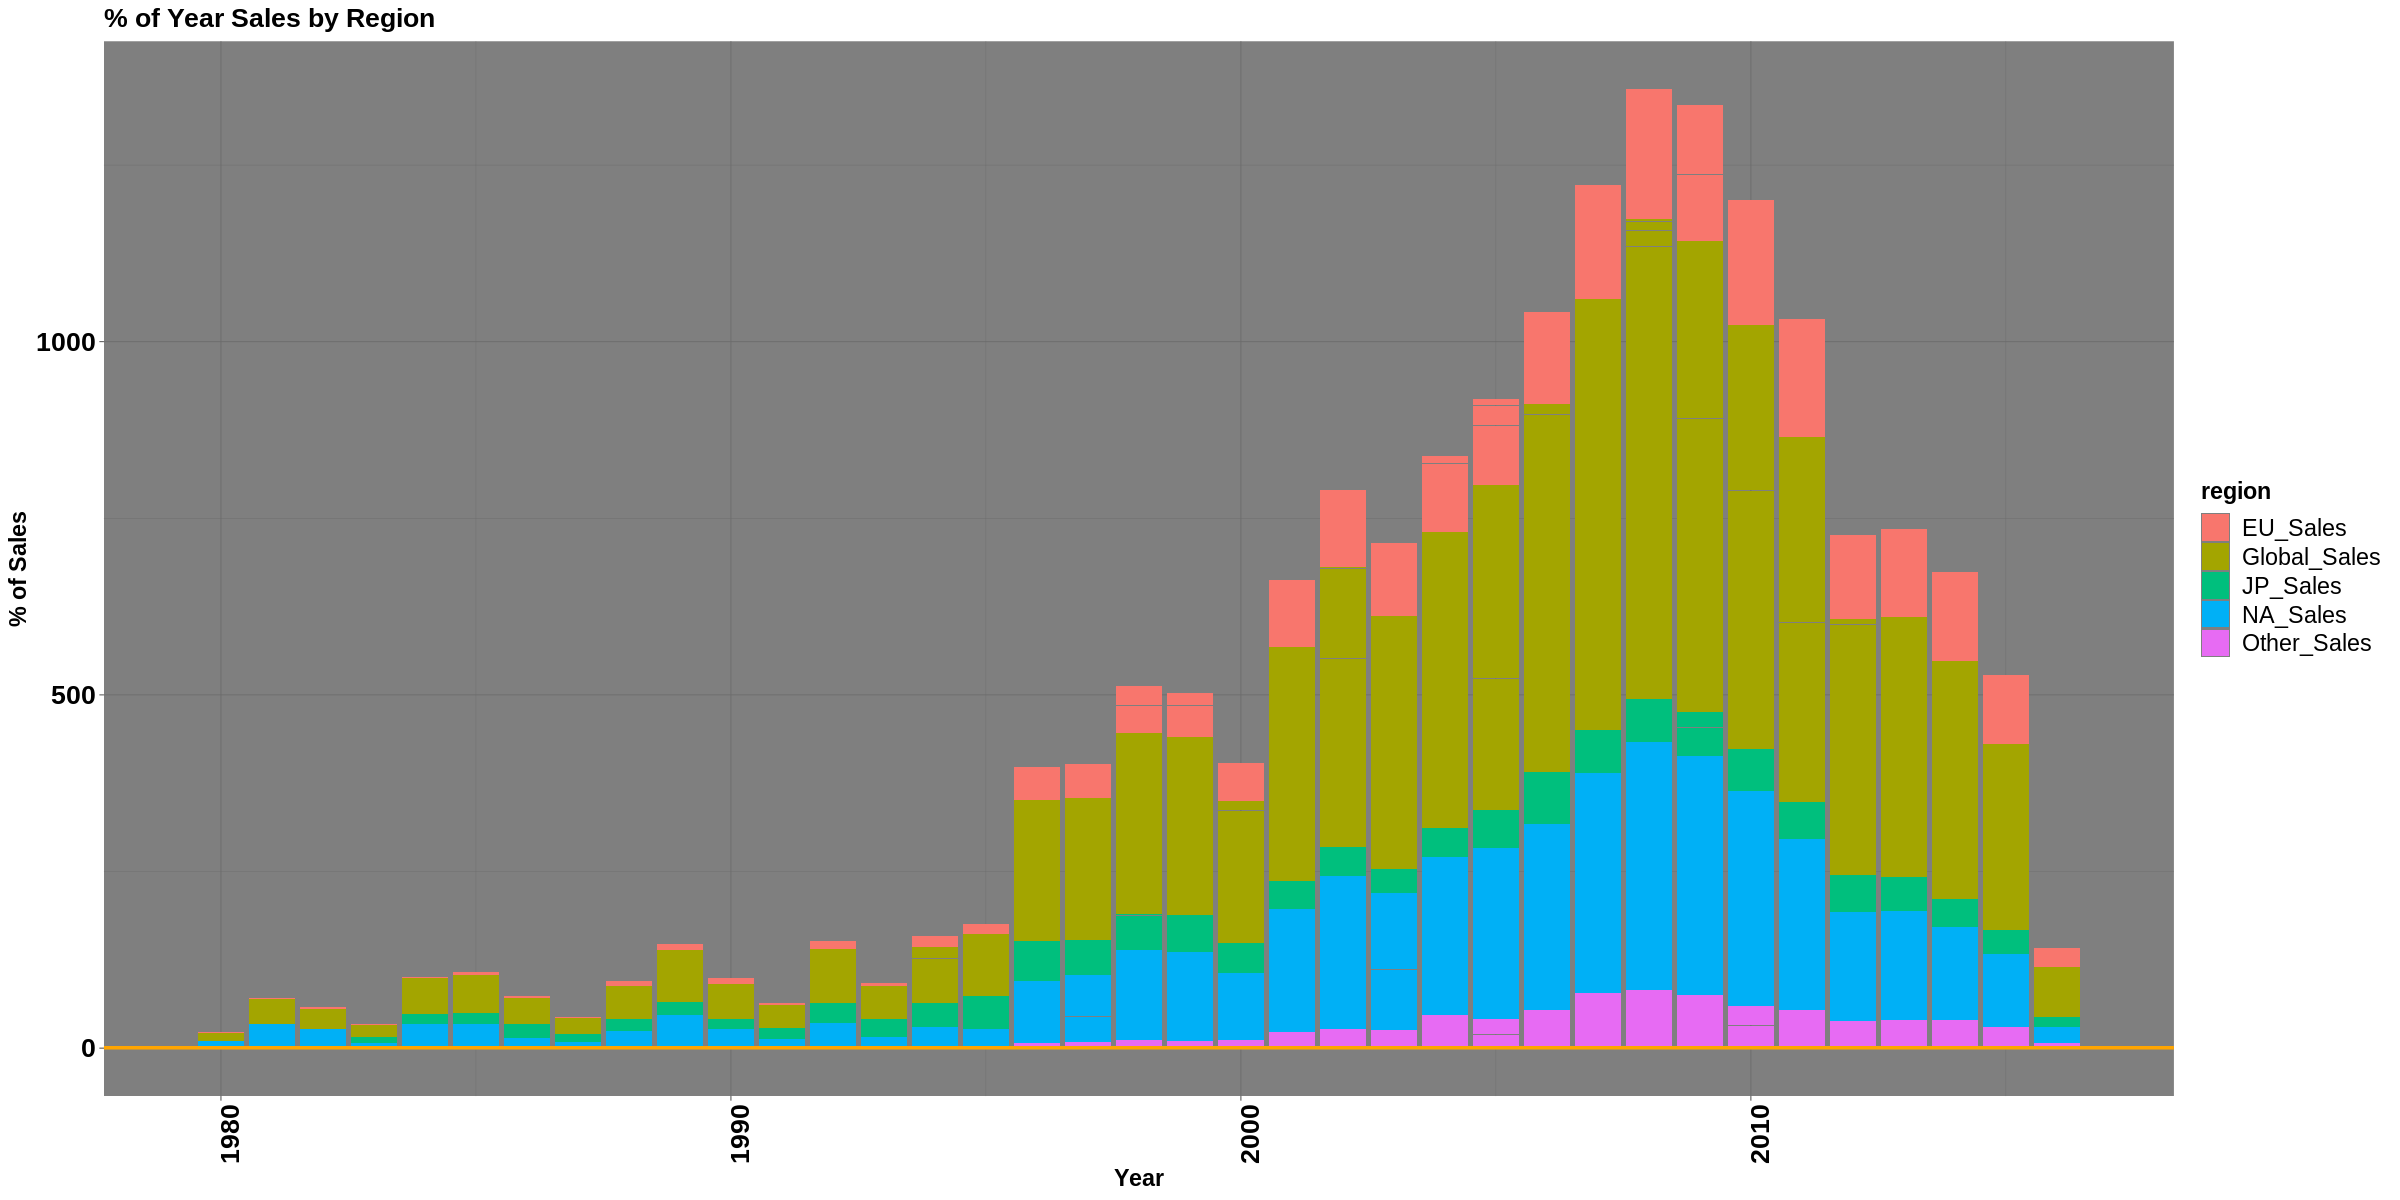

In [ ]:
 region_sales_plot+theme_dark() +
  labs(title = "% of Year Sales by Region", y= "% of Sales", x= "Year", fill = "region") +
  theme(axis.text.x = element_text(angle = 90, color = "black", size = 16, face = "bold"),
        plot.title = element_text(size = 16, color = "black", face = "bold"),
        axis.title = element_text(size = 14, color = "black", face = "bold"),
        axis.text.y = element_text(color = "black", face = "bold", size = 16),
        legend.title = element_text(size = 14, face = "bold", color = "black"),
        legend.text = element_text (size = 14, color = "black")) +
  geom_hline(yintercept = 0.5, color = "orange", size = 1)

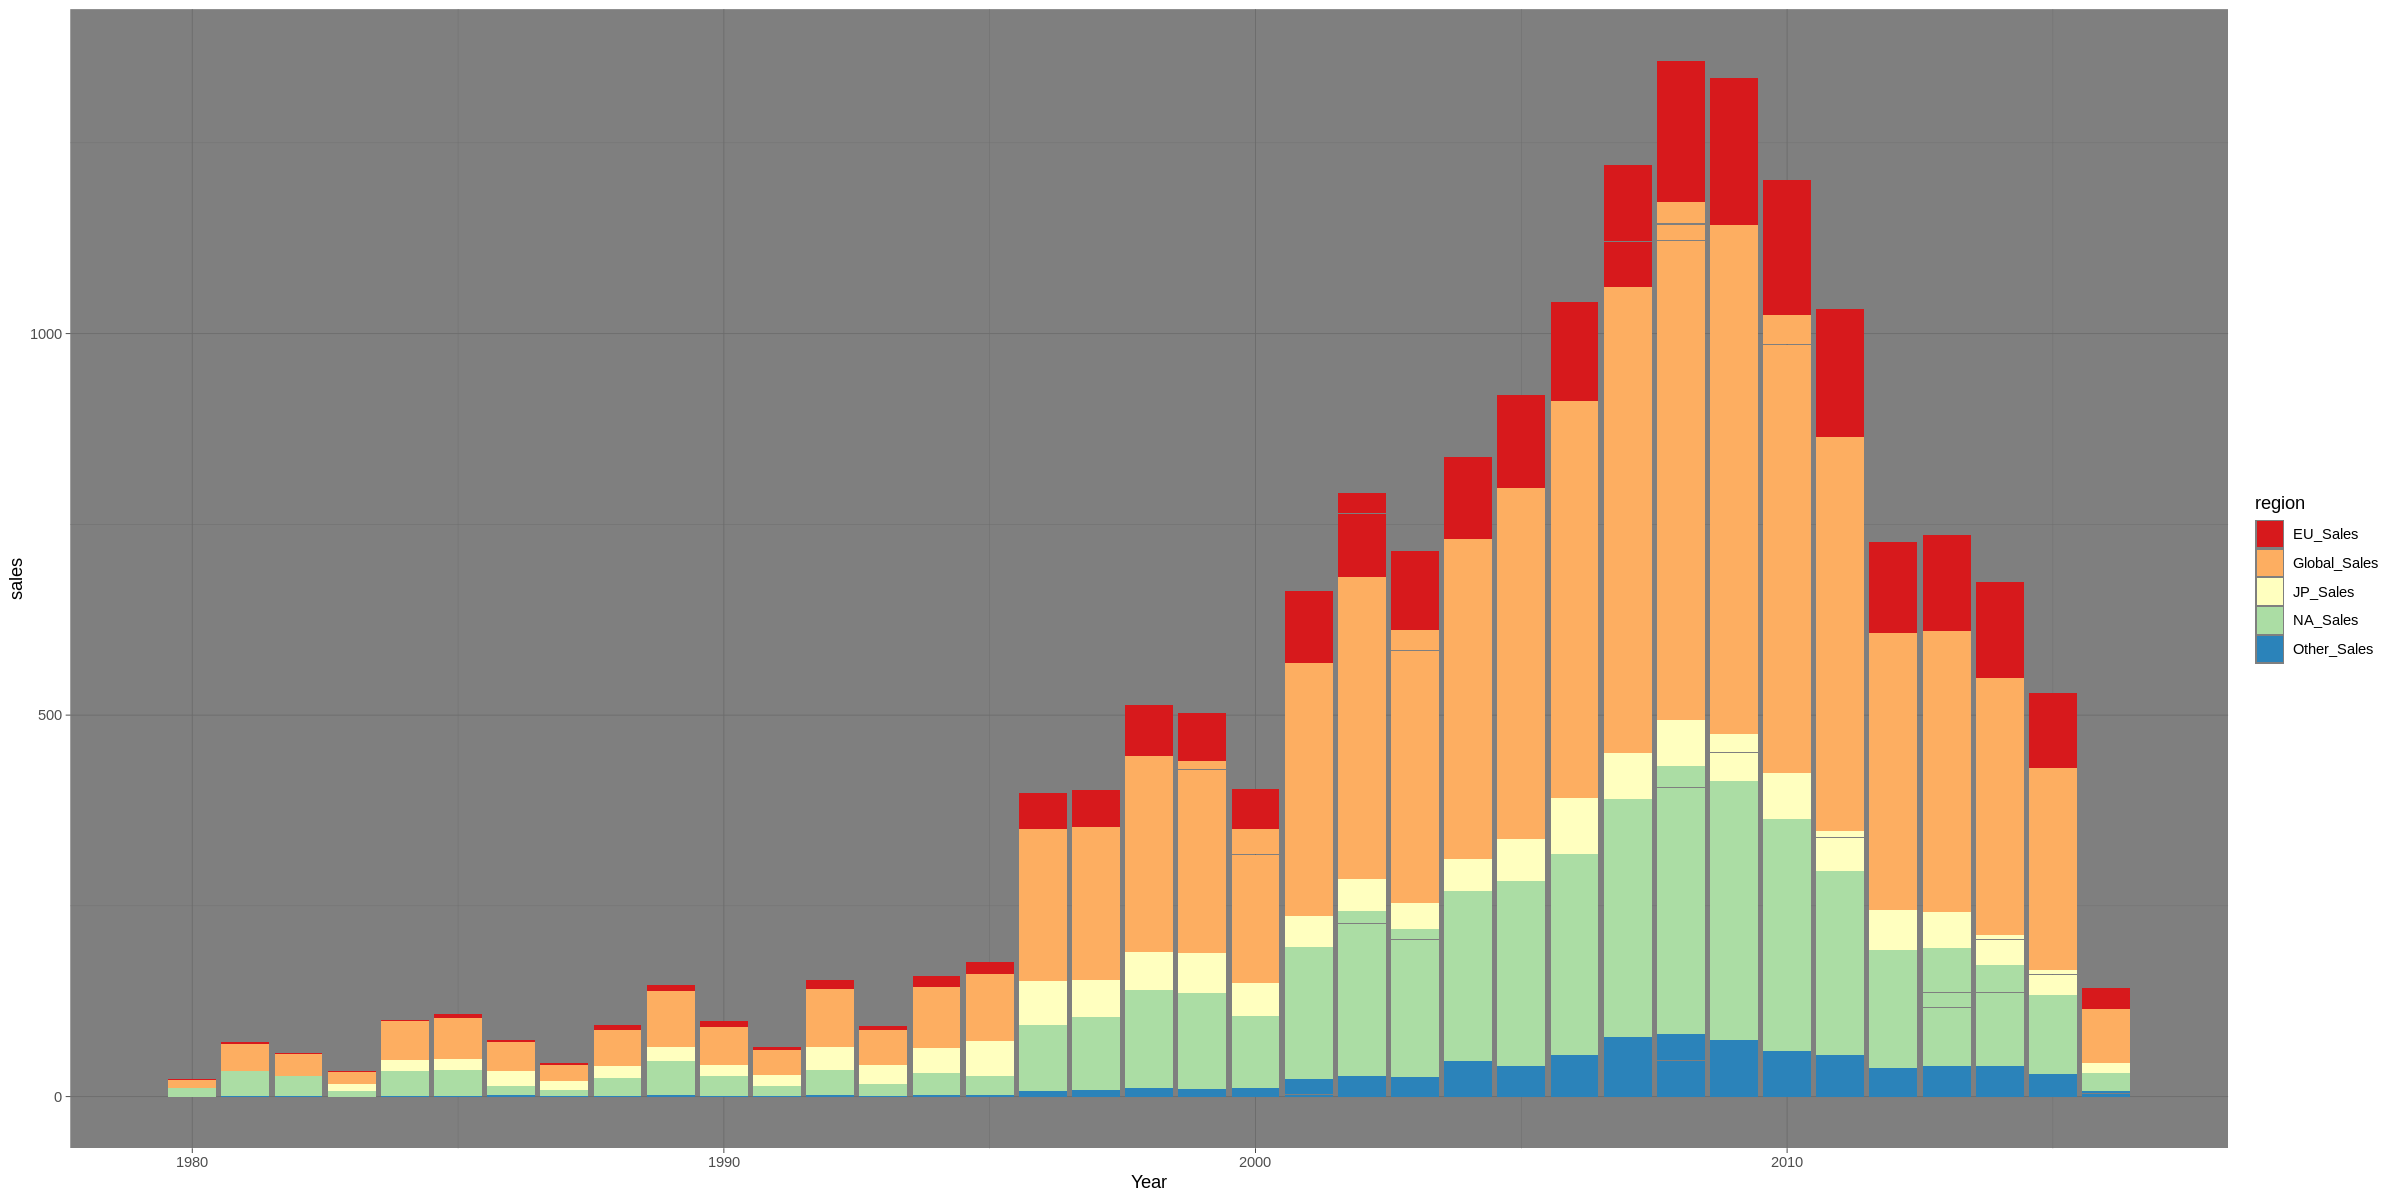

In [ ]:
 region_sales_plot+theme_dark() +scale_fill_brewer(palette="Spectral")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



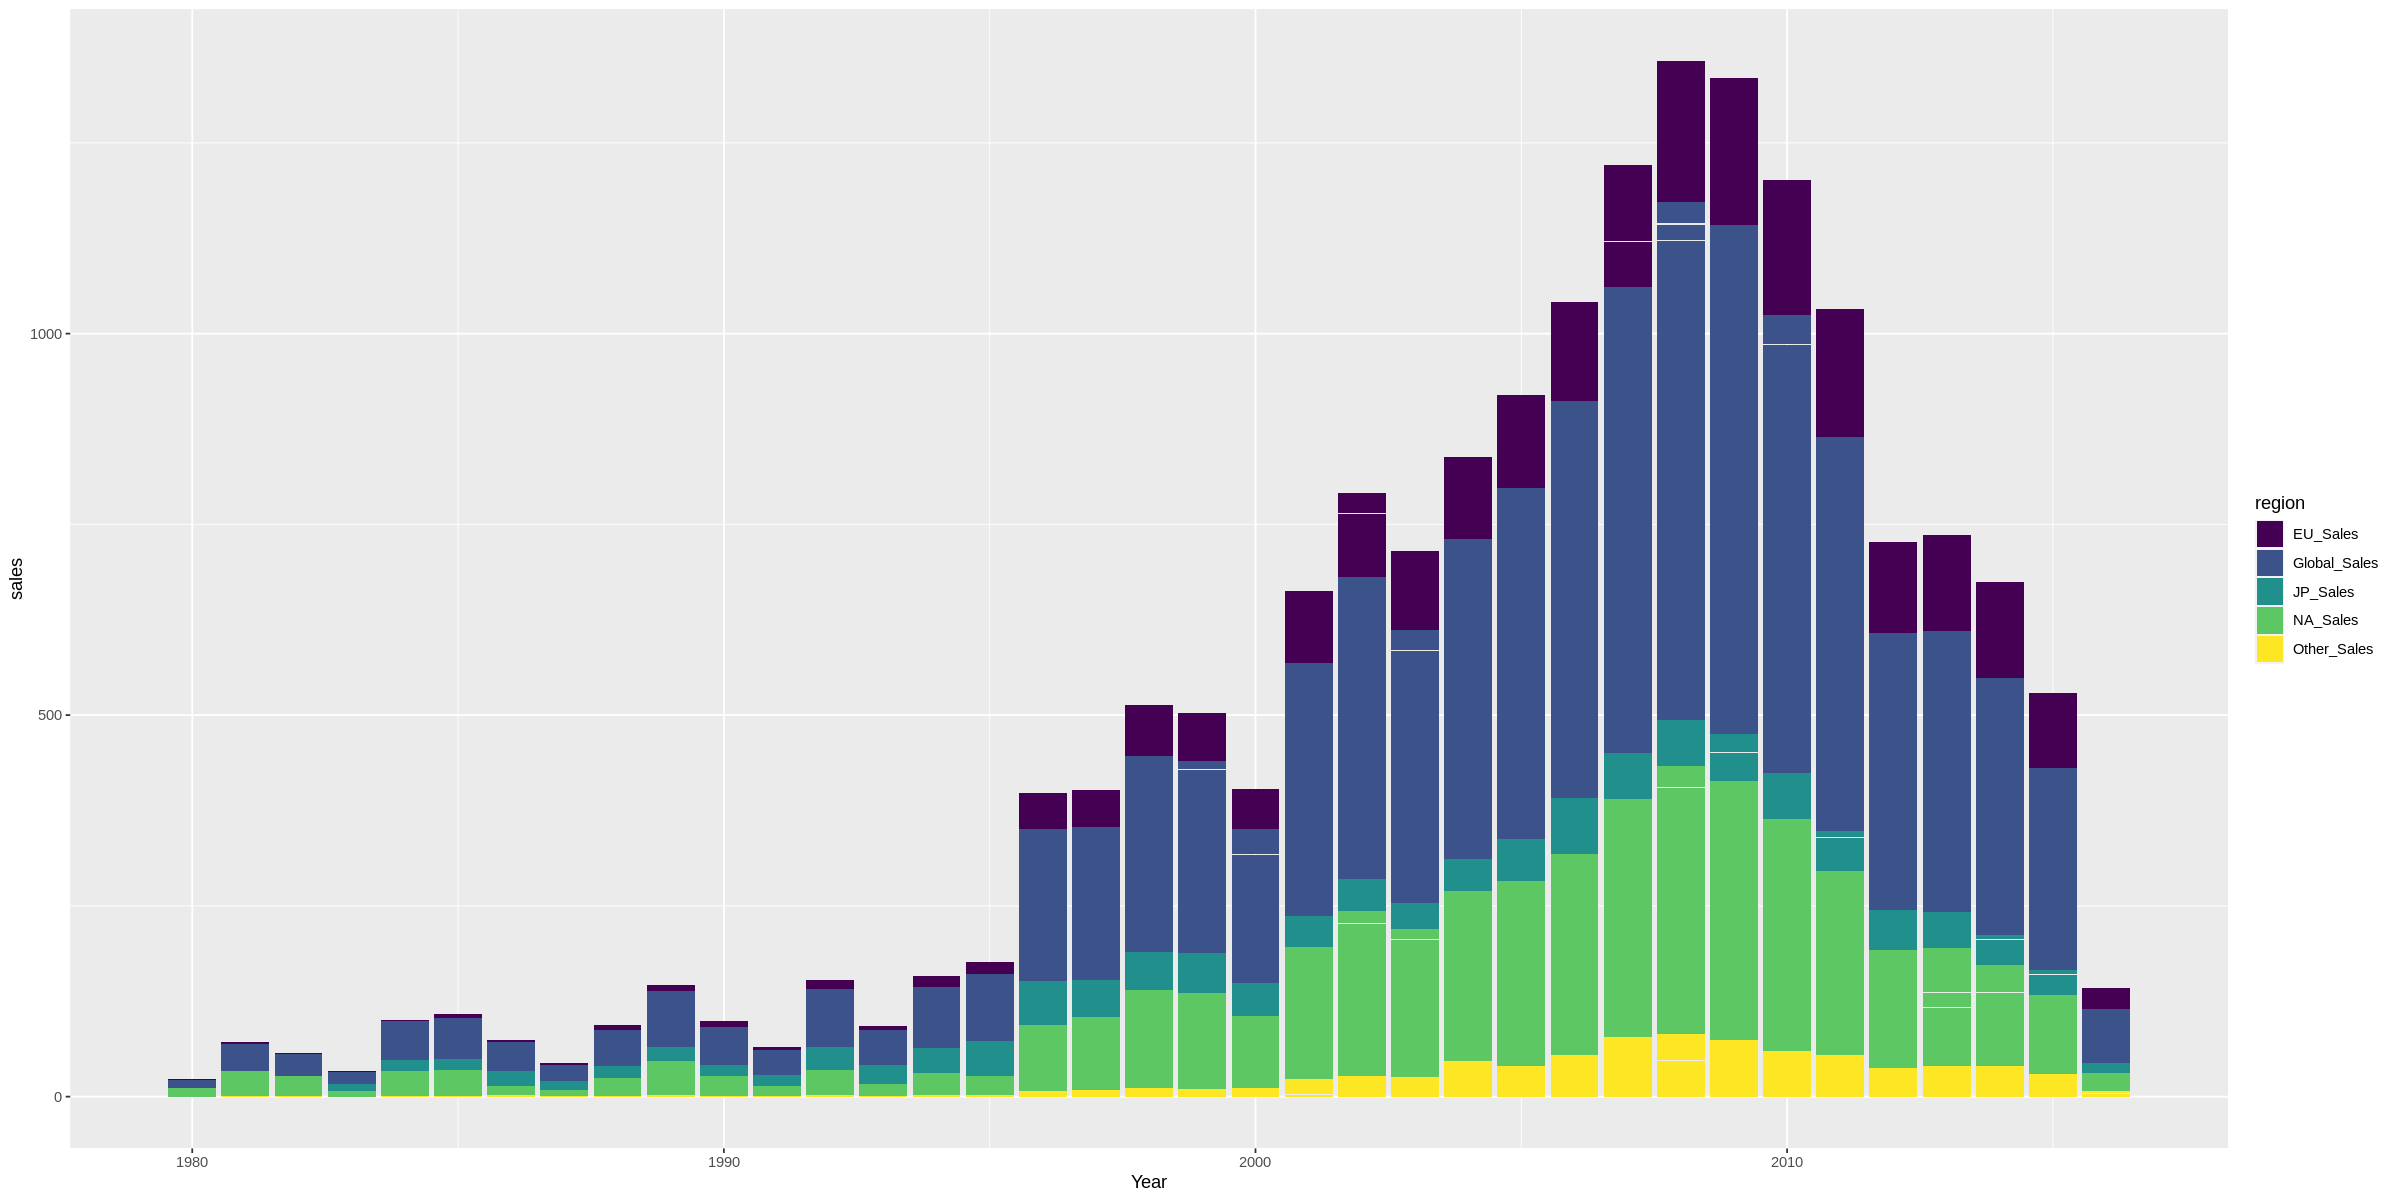

In [ ]:
install.packages("viridis")
library(viridis)

region_sales_plot +
 scale_fill_viridis(discrete=TRUE)

In [ ]:
sale_by_region_totalyear<- sale_by_region%>% group_by(region,Year) %>% summarise(total_sales = sum(sales))
head(sale_by_region_totalyear)

`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


region,Year,total_sales
<chr>,<dbl>,<dbl>
EU_Sales,1980,0.67
EU_Sales,1981,1.96
EU_Sales,1982,1.65
EU_Sales,1983,0.80
EU_Sales,1984,2.10
EU_Sales,1985,4.74


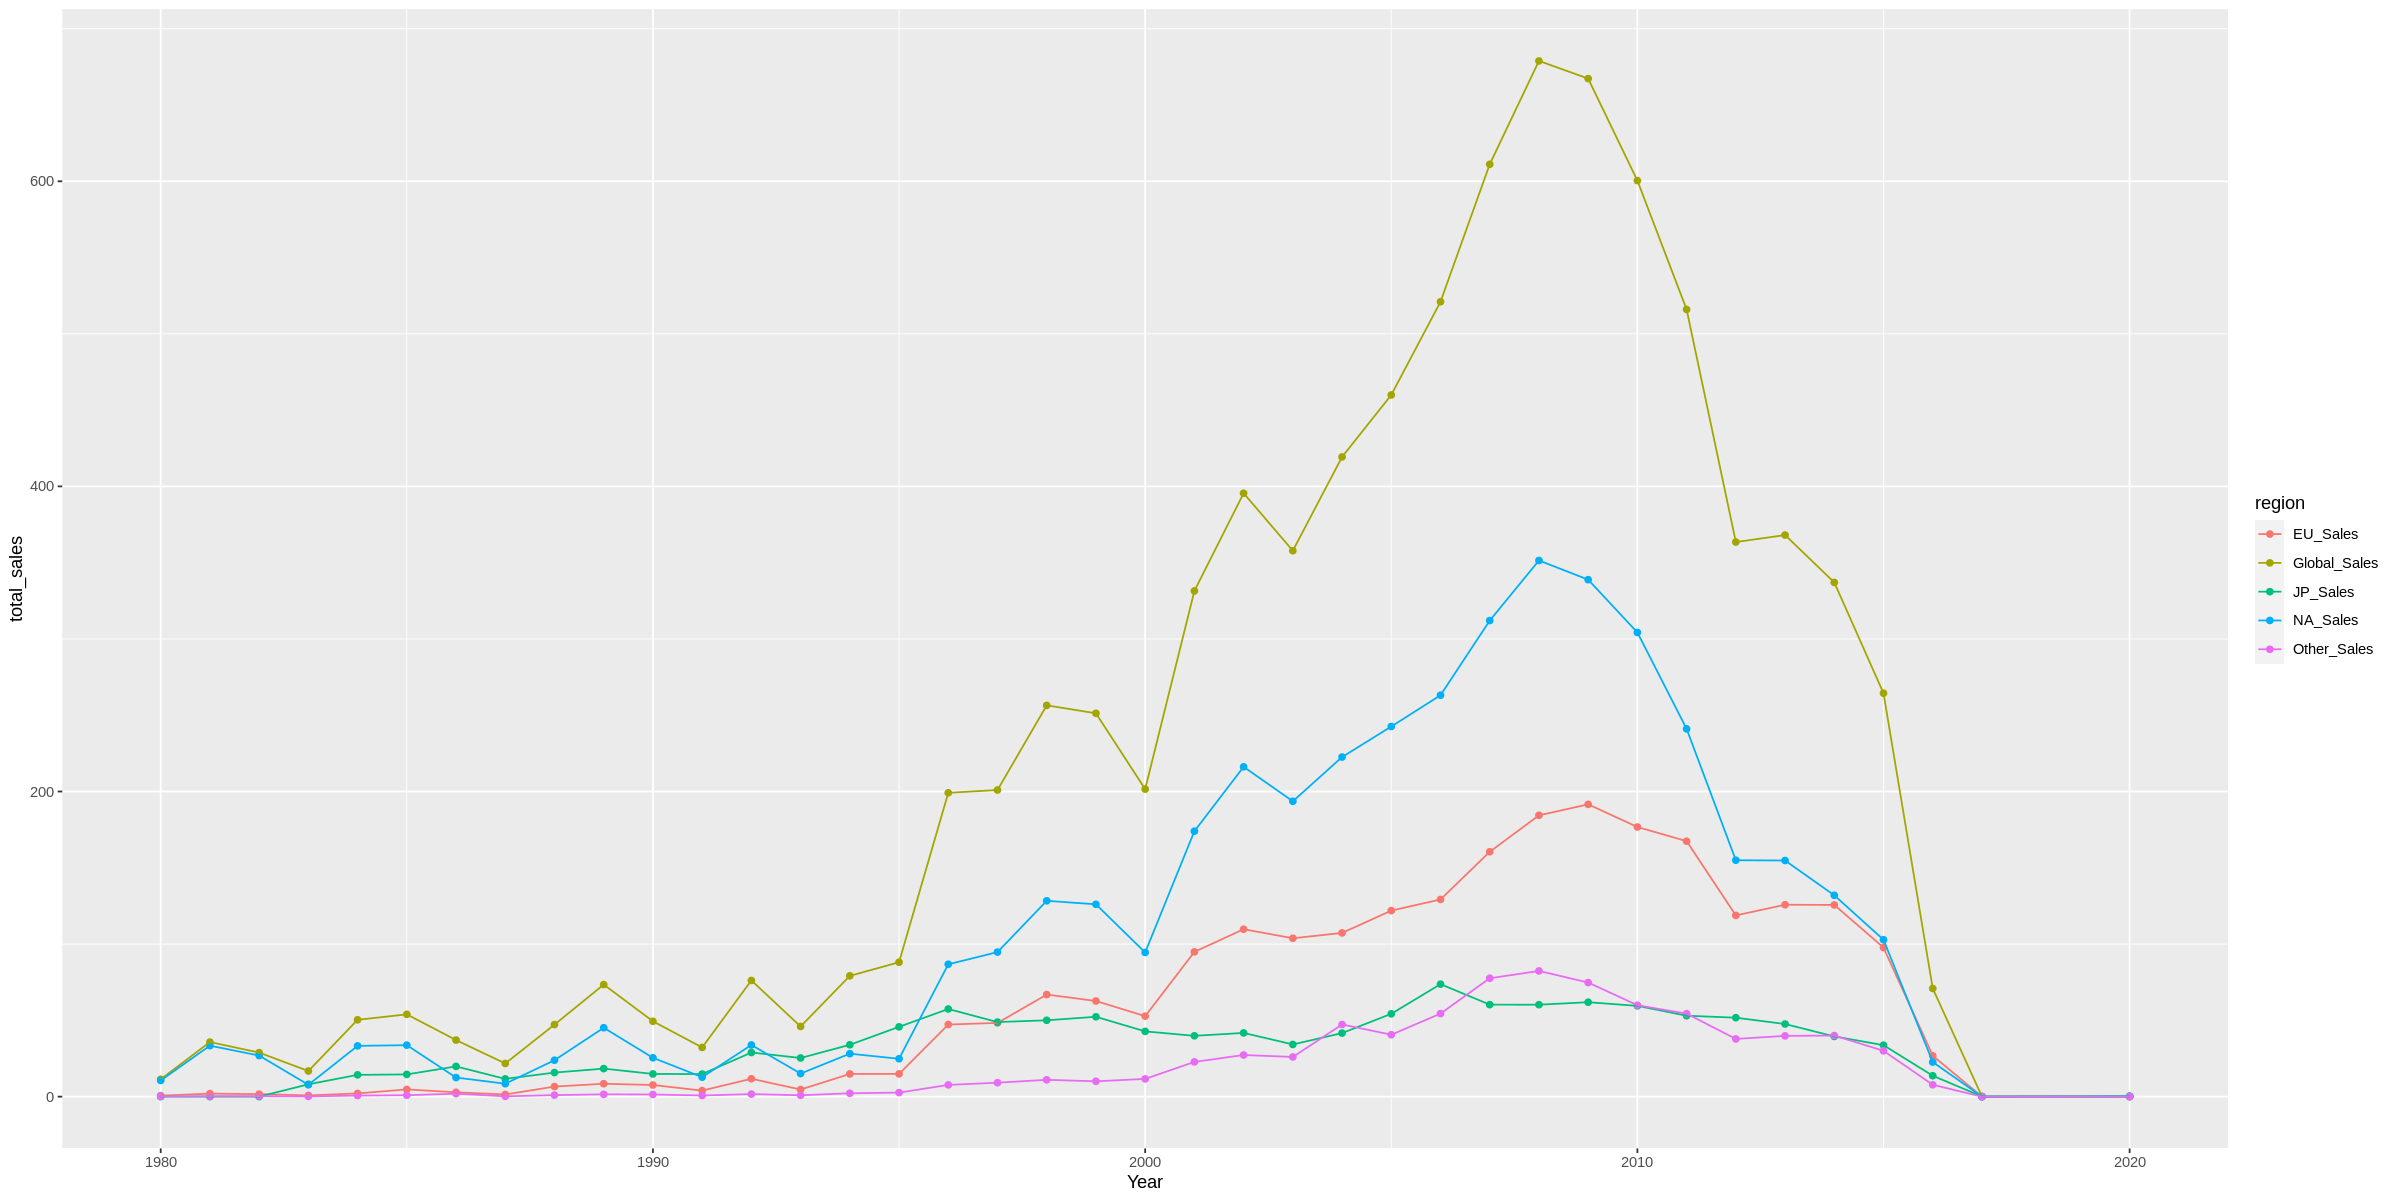

In [ ]:
ggplot(sale_by_region_totalyear, aes(color=region, y=total_sales, x=Year)) + 
    geom_point()+geom_line()


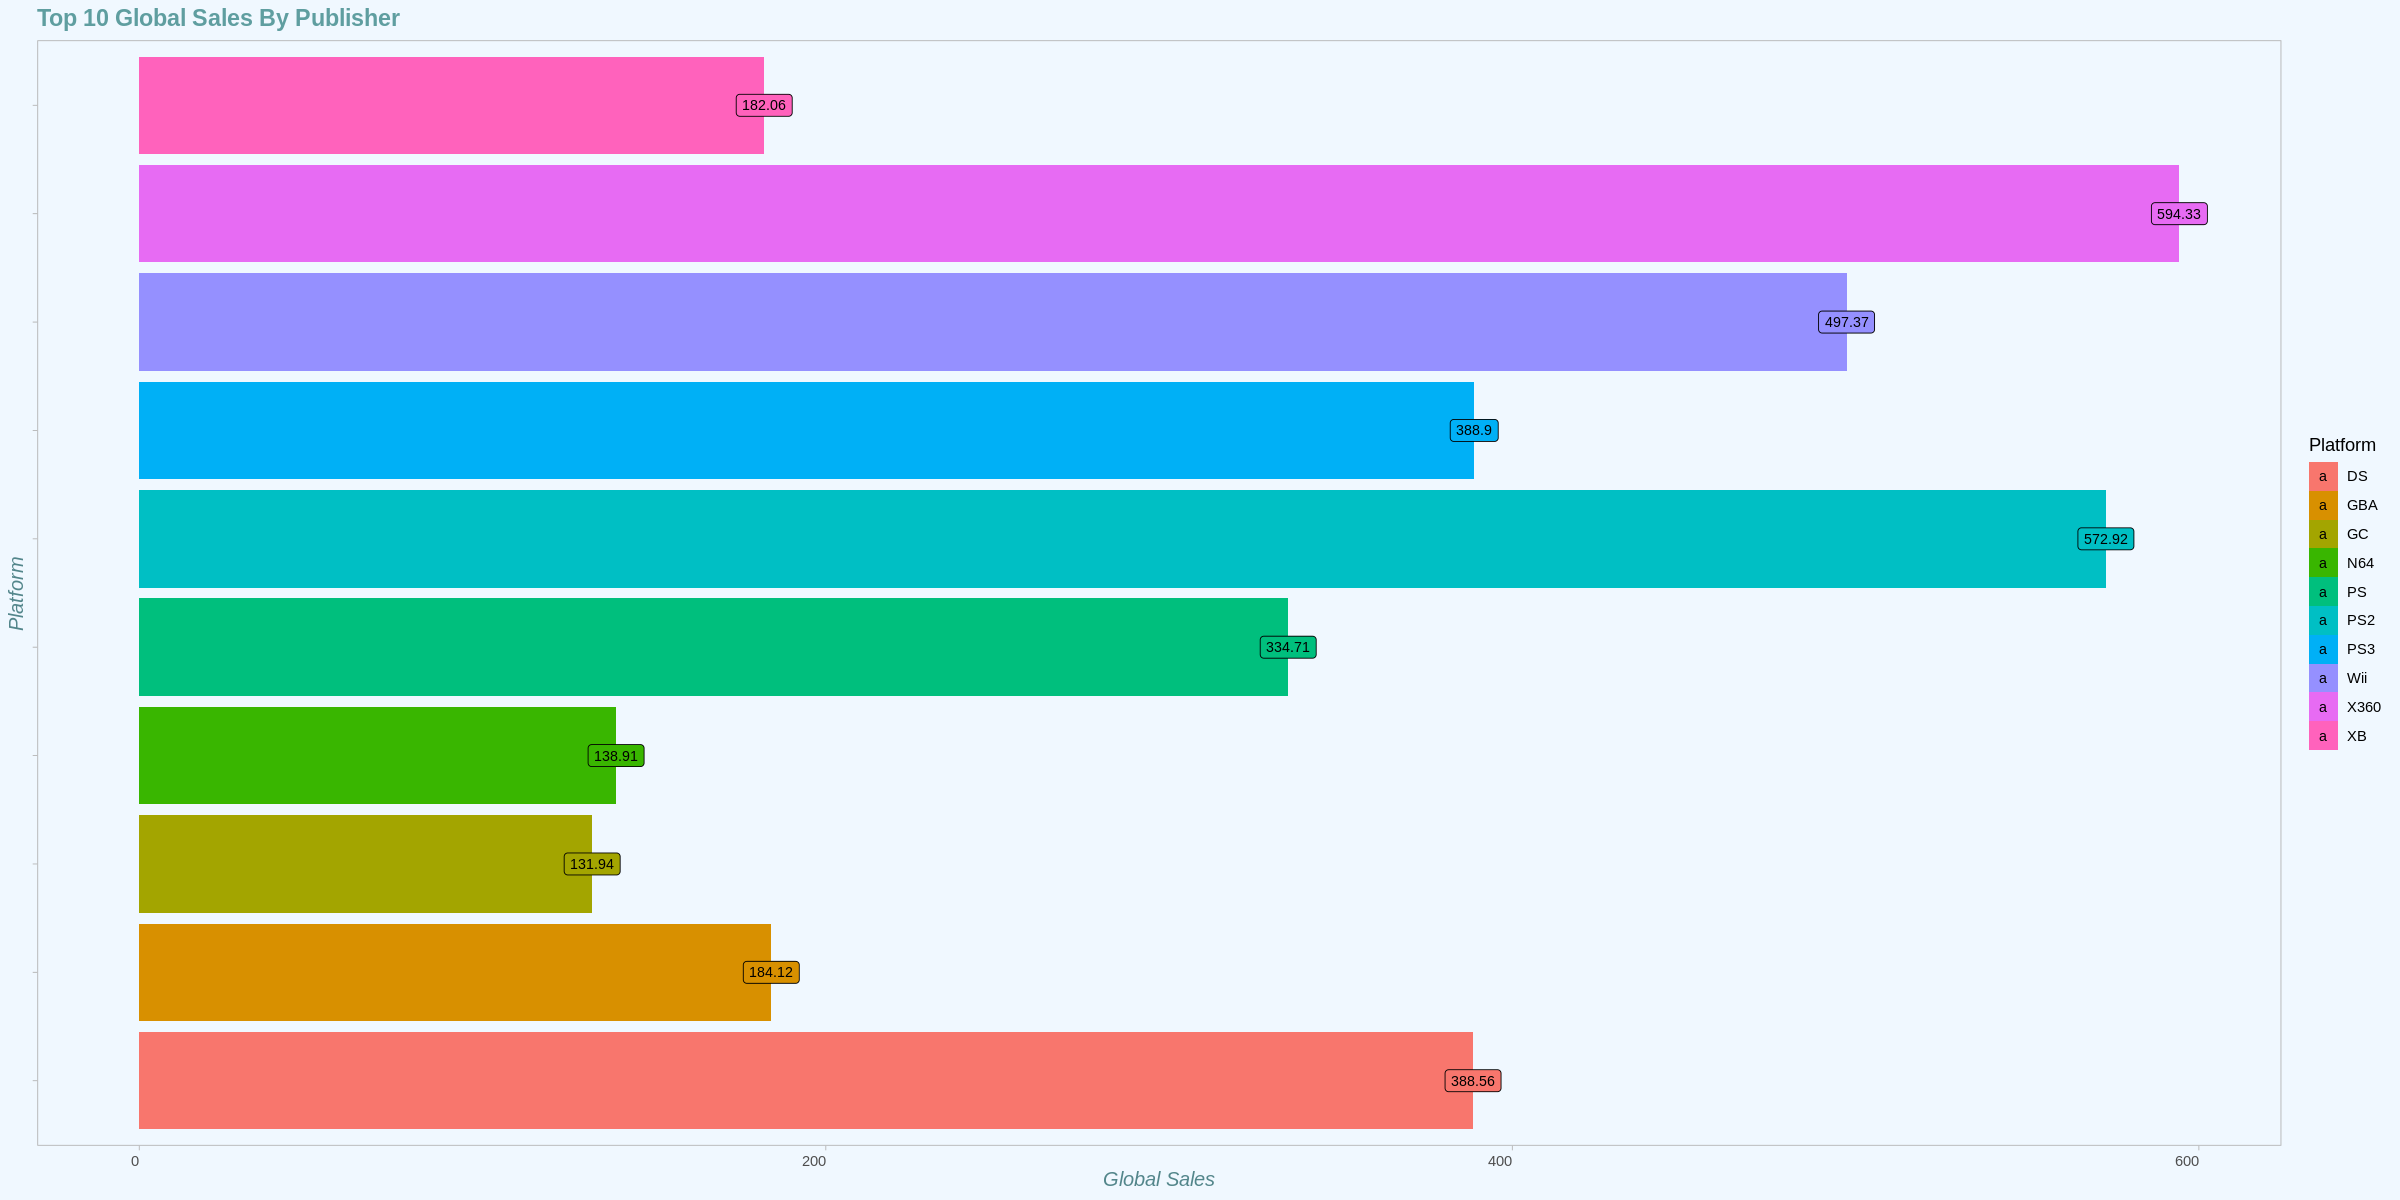

In [ ]:

ggplot(data = head(vgsales_NA_by_platform, 10), aes(x = Platform, y = total_sales, fill = Platform)) + 
  geom_bar(stat = 'identity') +
  geom_label(aes(label = total_sales), size = 3) +
    theme_light() +
  coord_flip() +
  theme(axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=1),legend.position="top") + 
  theme(panel.grid.major = element_line(linetype = "blank"), 
    panel.grid.minor = element_line(linetype = "blank"), 
    axis.title = element_text(size = 12, 
        face = "italic", colour = "cadetblue4"), 
    plot.title = element_text(size = 14, 
        face = "bold", colour = "cadetblue"), 
    panel.background = element_rect(fill = NA), 
    plot.background = element_rect(fill = "aliceblue", 
        colour = "aliceblue", size = 1)) +labs(title = "Top 10 Global Sales By Publisher", y = "Global Sales", 
    colour = "Blue") + theme(legend.background = element_rect(fill = "aliceblue"), 
    legend.position = "right", axis.text.y=element_blank())

In [ ]:
install.packages("reshape"); 
library(reshape)

Platform_sales_all <- vgsales %>%
  group_by(Platform) %>%
  summarise(Global_Sales = sum(Global_Sales),
            NA_Sales = sum(NA_Sales),
            EU_Sales = sum(EU_Sales),
            JP_Sales = sum(JP_Sales),
            Other_Sales = sum(Other_Sales), .groups = 'drop') %>% 
  arrange(desc(Global_Sales))

# column to row
Platform_sales_all <- head(Platform_sales_all, 10)   # choose 10 platforms
Platform_sales_all <- melt(Platform_sales_all)
names(Platform_sales_all) <- c("Platform", "district", "sales")

ggplot(data = Platform_sales_all, aes(x = district, y = sales, fill = Platform)) +
  geom_bar(stat = "identity", position = "dodge") +
    theme_light() +
  theme(axis.text.x = element_text(
    angle = 0,
    vjust = 0,
    hjust = 0.5
  ),
  legend.position = "top") + theme(
    panel.grid.major = element_line(linetype = "blank"),
    panel.grid.minor = element_line(linetype = "blank"),
    axis.title = element_text(
      size = 12,
      face = "italic",
      colour = "cadetblue4"
    ),
    plot.title = element_text(
      size = 14,
      face = "bold",
      colour = "cadetblue"
    ),
    panel.background = element_rect(fill = NA),
    plot.background = element_rect(
      fill = "aliceblue",
      colour = "aliceblue",
      size = 1
    )
  ) + labs(title = "Each district sales By Platform", y = "Sales",
           colour = "Blue") + theme(legend.background = element_rect(fill = "aliceblue"),
                                    legend.position = "right")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:tidyr’:

    expand, smiths


Using Platform as id variables



ERROR: ignored

# Dataset 2

In [ ]:
vgsales_ratings <- read.csv("Video_Games_Sales_as_at_22_Dec_2016.csv", stringsAsFactors = FALSE)

In [ ]:
head(vgsales_ratings)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<chr>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA,NA,,NA,,
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NA,NA,,NA,,
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NA,NA,,NA,,


In [ ]:
colSums(is.na(vgsales_ratings))

Name        Platform Year_of_Release           Genre       Publisher 
              0               0               0               0               0 
       NA_Sales        EU_Sales        JP_Sales     Other_Sales    Global_Sales 
              0               0               0               0               0 
   Critic_Score    Critic_Count      User_Score      User_Count       Developer 
           8582            8582               0            9129               0 
         Rating 
              0

In [ ]:
str(vgsales_ratings)

'data.frame':	16719 obs. of  16 variables:
 $ Name           : chr  "Wii Sports" "Super Mario Bros." "Mario Kart Wii" "Wii Sports Resort" ...
 $ Platform       : chr  "Wii" "NES" "Wii" "Wii" ...
 $ Year_of_Release: chr  "2006" "1985" "2008" "2009" ...
 $ Genre          : chr  "Sports" "Platform" "Racing" "Sports" ...
 $ Publisher      : chr  "Nintendo" "Nintendo" "Nintendo" "Nintendo" ...
 $ NA_Sales       : num  41.4 29.1 15.7 15.6 11.3 ...
 $ EU_Sales       : num  28.96 3.58 12.76 10.93 8.89 ...
 $ JP_Sales       : num  3.77 6.81 3.79 3.28 10.22 ...
 $ Other_Sales    : num  8.45 0.77 3.29 2.95 1 0.58 2.88 2.84 2.24 0.47 ...
 $ Global_Sales   : num  82.5 40.2 35.5 32.8 31.4 ...
 $ Critic_Score   : int  76 NA 82 80 NA NA 89 58 87 NA ...
 $ Critic_Count   : int  51 NA 73 73 NA NA 65 41 80 NA ...
 $ User_Score     : chr  "8" "" "8.3" "8" ...
 $ User_Count     : int  322 NA 709 192 NA NA 431 129 594 NA ...
 $ Developer      : chr  "Nintendo" "" "Nintendo" "Nintendo" ...
 $ Rating         

In [ ]:
vgsales_ratings<-vgsales_ratings%>%filter(Year_of_Release != "N/A")%>% filter(Publisher != "N/A")%>% mutate(Year_of_Release = as.numeric(Year_of_Release))%>% 
mutate(User_Score = as.numeric(User_Score))


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [ ]:
dim(vgsales_ratings)

[1] 16418    16

In [ ]:
summary(vgsales_ratings)

     Name             Platform         Year_of_Release    Genre          
 Length:16418       Length:16418       Min.   :1980    Length:16418      
 Class :character   Class :character   1st Qu.:2003    Class :character  
 Mode  :character   Mode  :character   Median :2007    Mode  :character  
                                       Mean   :2006                      
                                       3rd Qu.:2010                      
                                       Max.   :2020                      
                                                                         
  Publisher            NA_Sales          EU_Sales         JP_Sales       
 Length:16418       Min.   : 0.0000   Min.   : 0.000   Min.   : 0.00000  
 Class :character   1st Qu.: 0.0000   1st Qu.: 0.000   1st Qu.: 0.00000  
 Mode  :character   Median : 0.0800   Median : 0.020   Median : 0.00000  
                    Mean   : 0.2642   Mean   : 0.146   Mean   : 0.07862  
                    3rd Qu.: 0.2400   

In [ ]:
vgsales_ratings$User_Score <- vgsales_ratings$User_Score * 10


In [ ]:
vgsales_ratings %>% count(Rating)



Rating,n
<chr>,<int>
,6651
AO,1
E,3921
E10+,1393
EC,8
K-A,3
M,1536
RP,1
T,2904


In [ ]:
vgsales_ratings <- vgsales_ratings %>% mutate(Rating = ifelse(Rating == "AO", "M", Rating))
vgsales_ratings <- vgsales_ratings %>% mutate(Rating = ifelse(Rating == "K-A", "E", Rating))
vgsales_ratings <- vgsales_ratings %>% mutate(Rating = ifelse(Rating == "RP", "E", Rating))

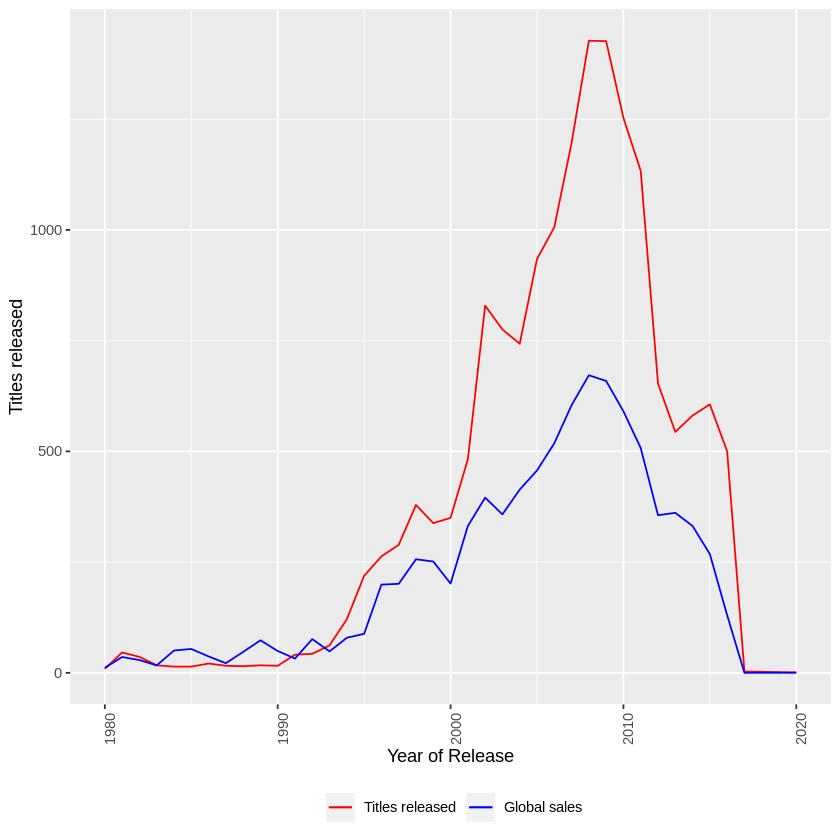

In [ ]:
color <- c("Titles released" = "red", "Global sales" = "blue")
vgsales_ratings %>% group_by(Year_of_Release) %>% 
  summarise(sales = sum(Global_Sales), count = n()) %>% 
  ggplot() + geom_line(aes(Year_of_Release, count, group = 1, color = "Titles released")) + 
  geom_line(aes(Year_of_Release, sales, group = 1, color = "Global sales")) + 
  xlab("Year of Release") + ylab("Titles released") + 
  theme(axis.text.x = element_text(angle = 90), legend.position = "bottom") +
  scale_color_manual(values = color) + labs(color = "")

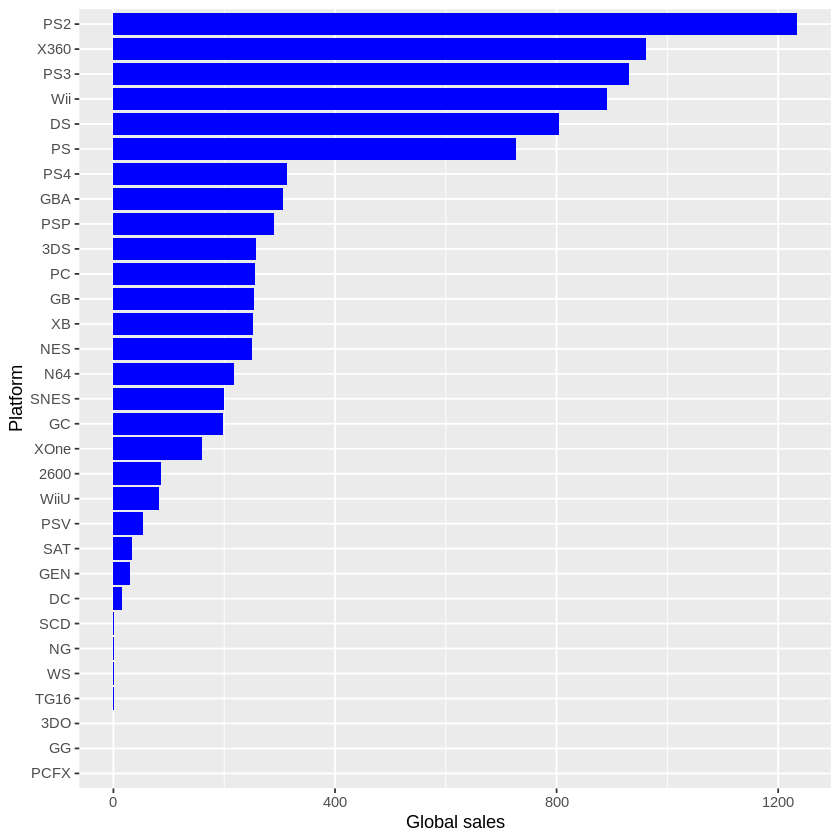

In [ ]:
vgsales_ratings %>% group_by(Platform) %>% 
  summarise(sales = sum(Global_Sales)) %>% ggplot() + 
  geom_bar(aes(reorder(Platform, sales), sales), stat = "identity", 
           fill = "blue") + 
  xlab("Platform") + ylab("Global sales") + 
  coord_flip()

In [ ]:
vgsales_ratings <- vgsales_ratings %>% mutate(platform2 = case_when(
  Platform %in% c("Wii", "DS", "3DS", "WiiU", "GC", "GBA") ~ "Nintendo",
  Platform %in% c("X360", "XB", "XOne") ~ "XBox",
  Platform %in% c("PS3", "PS4", "PS2", "PS", "PSP", "PSV") ~ "PS",
  Platform == "PC" ~ "PC",
  Platform == "DC" ~ "Sega"
))

`summarise()` has grouped output by 'platform2'. You can override using the
`.groups` argument.


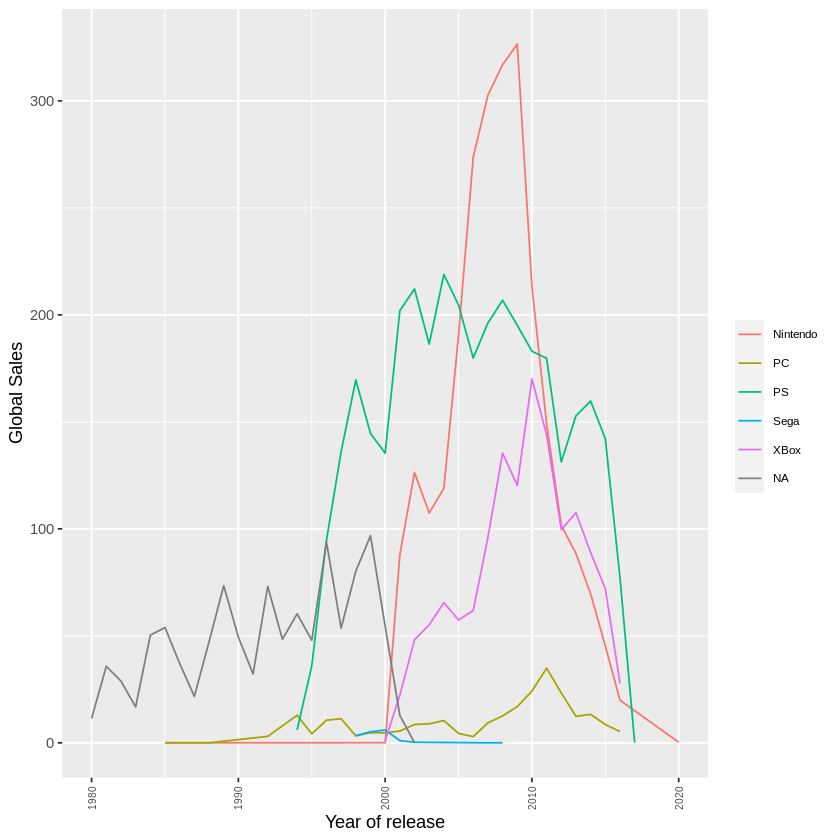

In [ ]:
vgsales_ratings %>% group_by(platform2, Year_of_Release) %>%
  summarise(sales = sum(Global_Sales)) %>% 
  ggplot() + 
  geom_line(aes(Year_of_Release, sales, group = platform2, color = platform2)) +
  xlab("Year of release") + ylab("Global Sales") + labs(color = "") + 
  theme(legend.text = element_text(size = 7),
        axis.text.x = element_text(angle = 90, hjust = 1, 
                                   vjust = 0.5, size = 6))

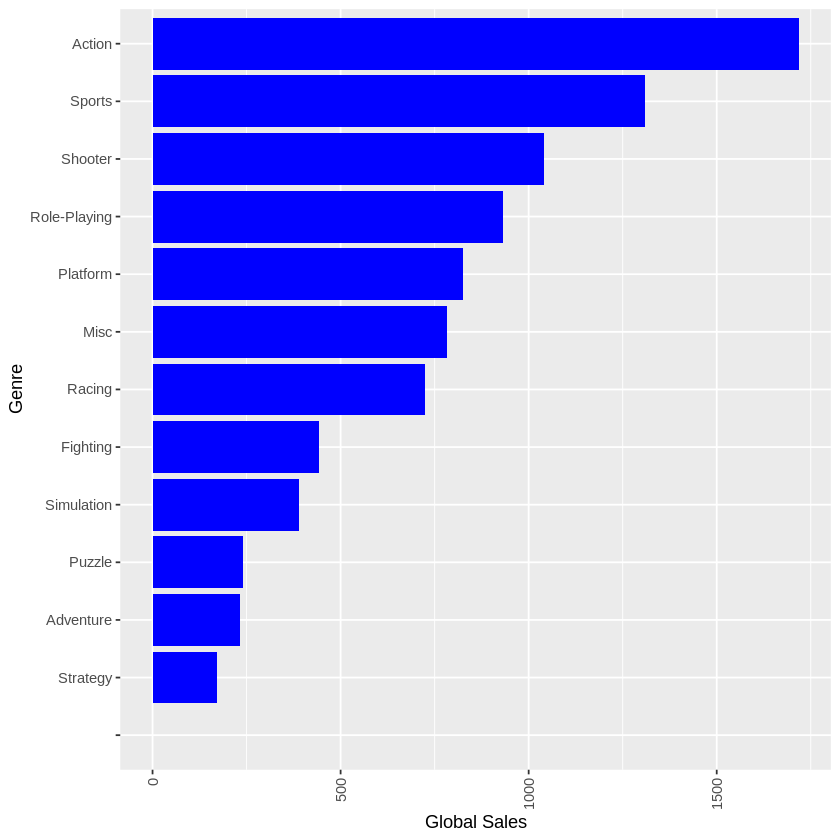

In [ ]:
vgsales_ratings %>% group_by(Genre) %>%
  summarise(sales = sum(Global_Sales)) %>%  
  ggplot() + 
  geom_bar(aes(reorder(Genre, sales), sales), stat = "identity", 
           fill = "blue") + 
  ylab("Global Sales") + xlab("Genre") + 
  theme(axis.text.x = element_text(angle = 90, 
                                   hjust = 1, vjust = 0.5)) + 
  coord_flip()

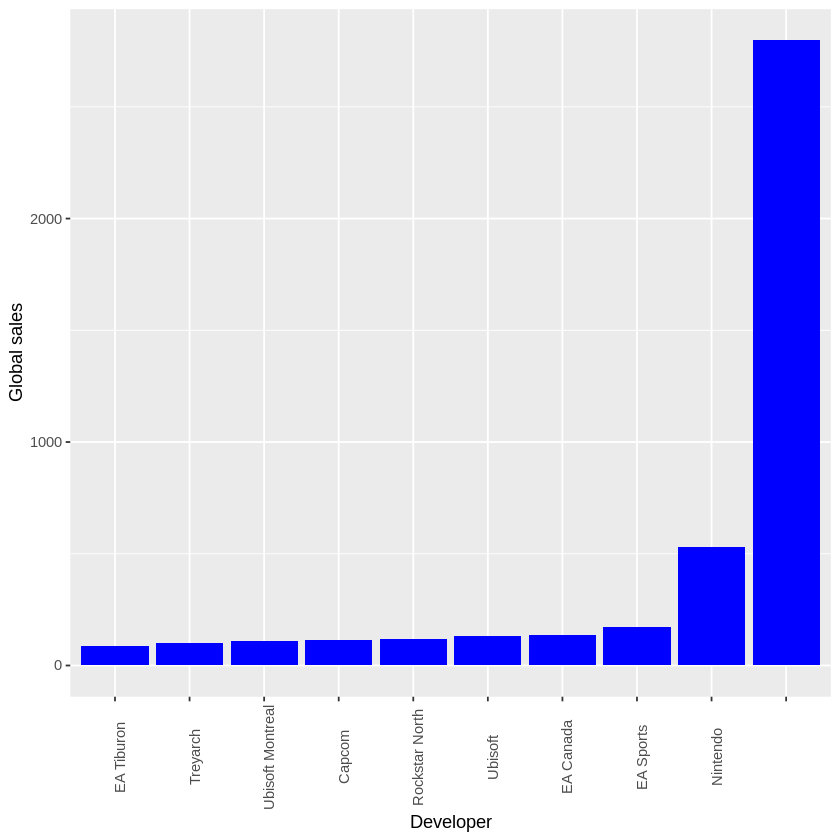

In [ ]:
vgsales_ratings %>% group_by(Developer) %>% 
  summarise(sales = sum(Global_Sales)) %>% 
  arrange(desc(sales)) %>% slice(1:10) %>% 
  ggplot() + 
  geom_bar(aes(reorder(Developer, sales), sales), stat = "identity", fill = "blue") +
  theme(axis.text.x = element_text(angle = 90)) + 
  xlab("Developer") + ylab("Global sales")

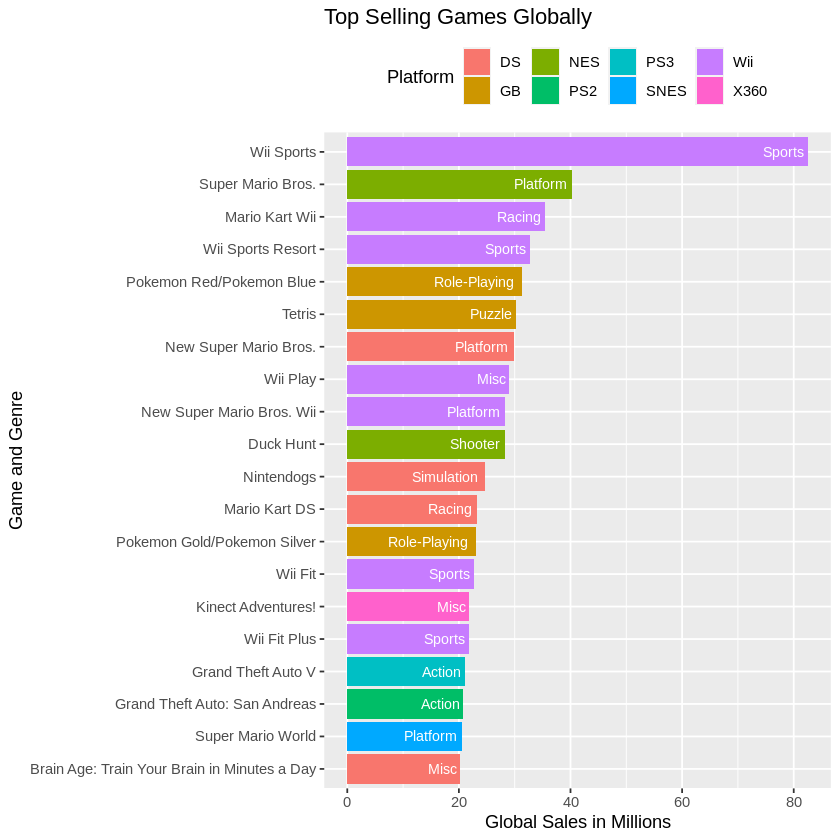

In [ ]:
ggplot(vgsales_ratings[vgsales_ratings$Global_Sales>20,], aes(x=reorder(Name,Global_Sales), y=Global_Sales, 
                                            fill=Platform)) +
    geom_bar(stat="identity")+
    theme(legend.position="top")+
    labs(title="Top Selling Games Globally", x= "Game and Genre", 
         y= "Global Sales in Millions")+
    geom_text(aes(label=Genre), hjust=1.1,color="white", size=3)+ 
    coord_flip()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



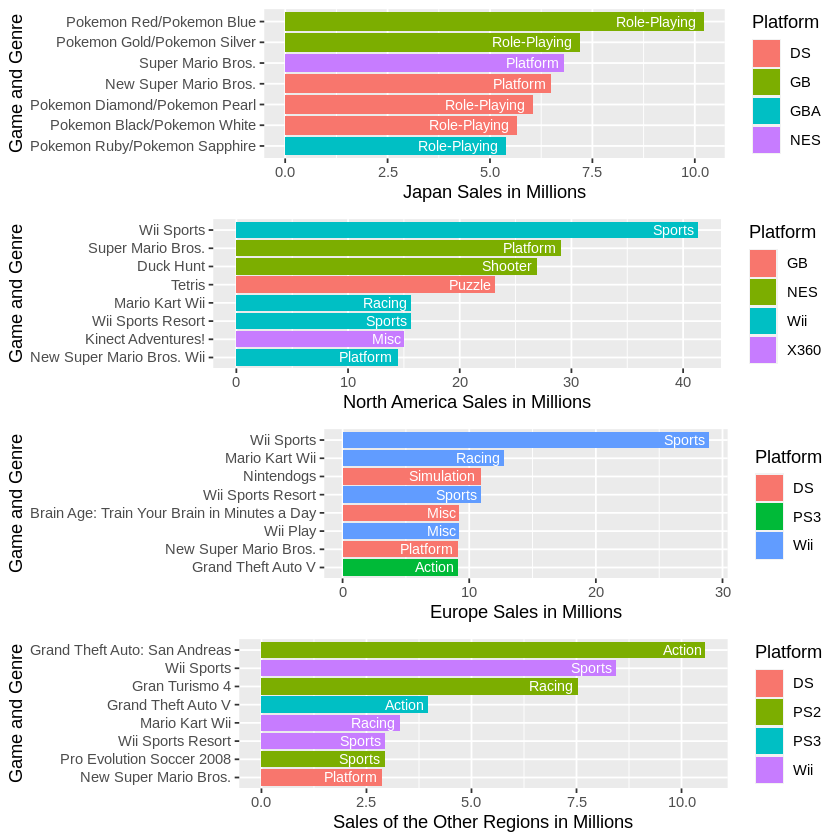

In [ ]:
install.packages('gridExtra')
library(gridExtra) #for plotting

p1=ggplot(vgsales_ratings[vgsales_ratings$JP_Sales>5.33,], aes(x=reorder(Name,JP_Sales), y=JP_Sales, 
                fill=Platform))+
     geom_bar(stat="identity")+
    labs( x= "Game and Genre", y= "Japan Sales in Millions")+
    geom_text(aes(label=Genre), hjust=1.1, color="white", size=3)+
    coord_flip()

p2=ggplot(vgsales_ratings[vgsales_ratings$NA_Sales>14,], aes(x=reorder(Name,NA_Sales), y=NA_Sales, 
                                            fill=Platform)) +
    geom_bar(stat="identity")+
    labs(x= "Game and Genre", y= "North America Sales in Millions")+
    geom_text(aes(label=Genre), hjust=1.1,color="white", size=3)+
    coord_flip()

p3=ggplot(vgsales_ratings[vgsales_ratings$EU_Sales>9.0,], aes(x=reorder(Name,EU_Sales), y=EU_Sales, 
                                            fill=Platform)) +
    geom_bar(stat="identity")+
    labs(x= "Game and Genre", y= "Europe Sales in Millions")+
    geom_text(aes(label=Genre), hjust=1.1,color="white", size=3)+
    coord_flip()

p4=ggplot(vgsales_ratings[vgsales_ratings$Other_Sales>2.85,], aes(x=reorder(Name,Other_Sales), y=Other_Sales, 
                                            fill=Platform)) +
    geom_bar(stat="identity")+
    labs(x= "Game and Genre", y= "Sales of the Other Regions in Millions")+
    geom_text(aes(label=Genre), hjust=1.1,color="white", size=3)+
    coord_flip()

grid.arrange(p1,p2,p3,p4, nrow=4)

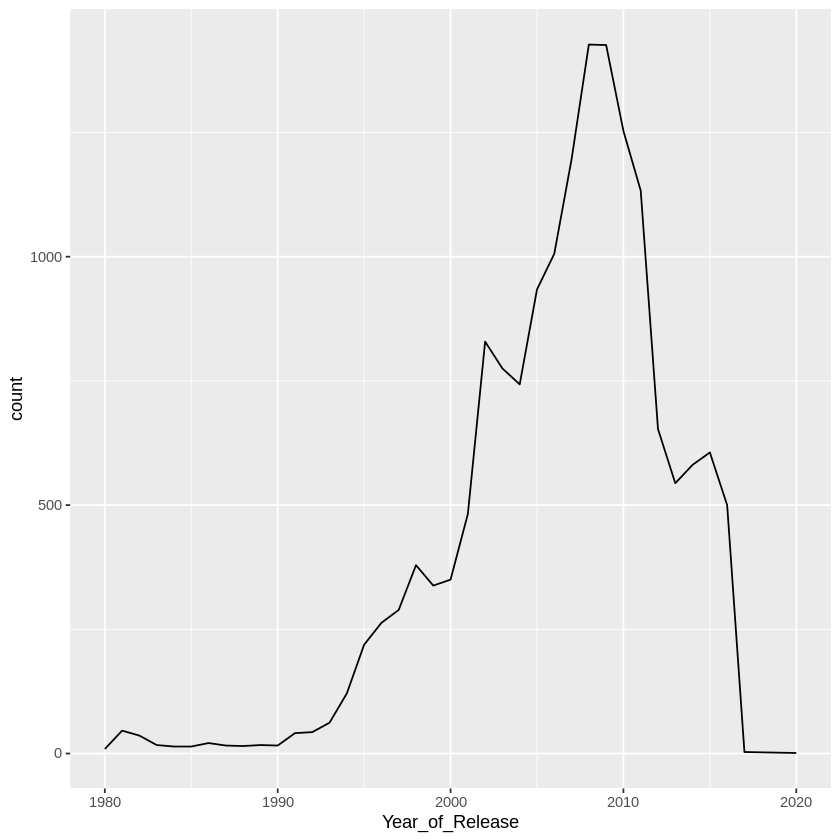

In [ ]:
ggplot(vgsales_ratings, aes(x=Year_of_Release))+geom_line(stat='count')
    


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 8436 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 8957 rows containing non-finite values (stat_smooth).”


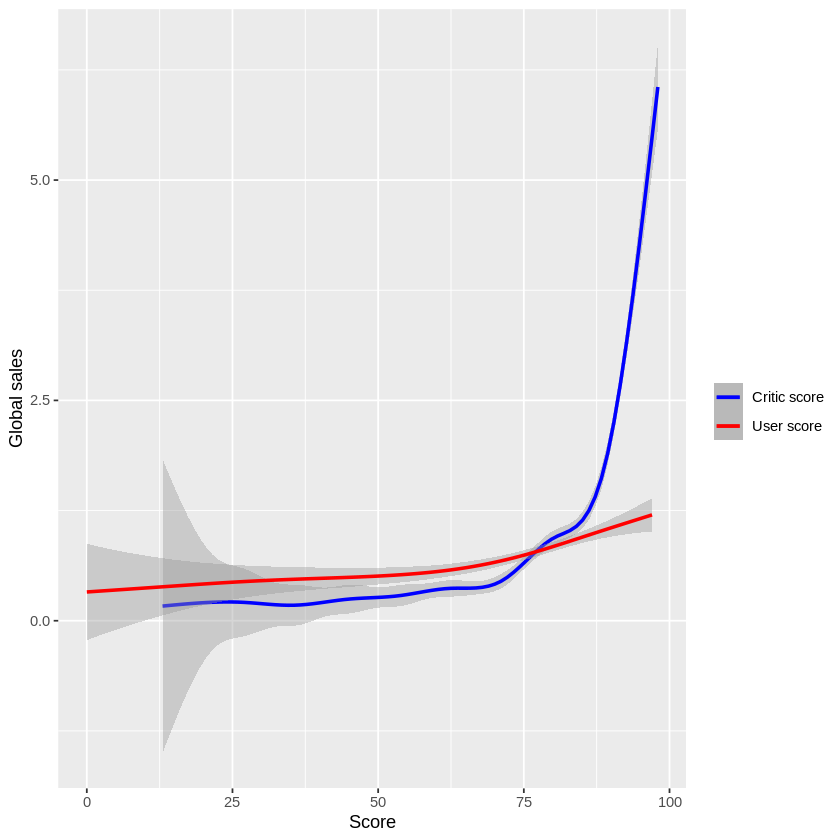

In [ ]:
colors <- c("Critic score" = "blue", "User score" = "red")
ggplot(vgsales_ratings) + 
  geom_smooth(aes(Critic_Score, Global_Sales, color = "Critic score")) + 
  geom_smooth(aes(User_Score, Global_Sales, color = "User score")) +
  labs(color = "") + xlab("Score") + ylab("Global sales") + 
  scale_color_manual(values = colors)

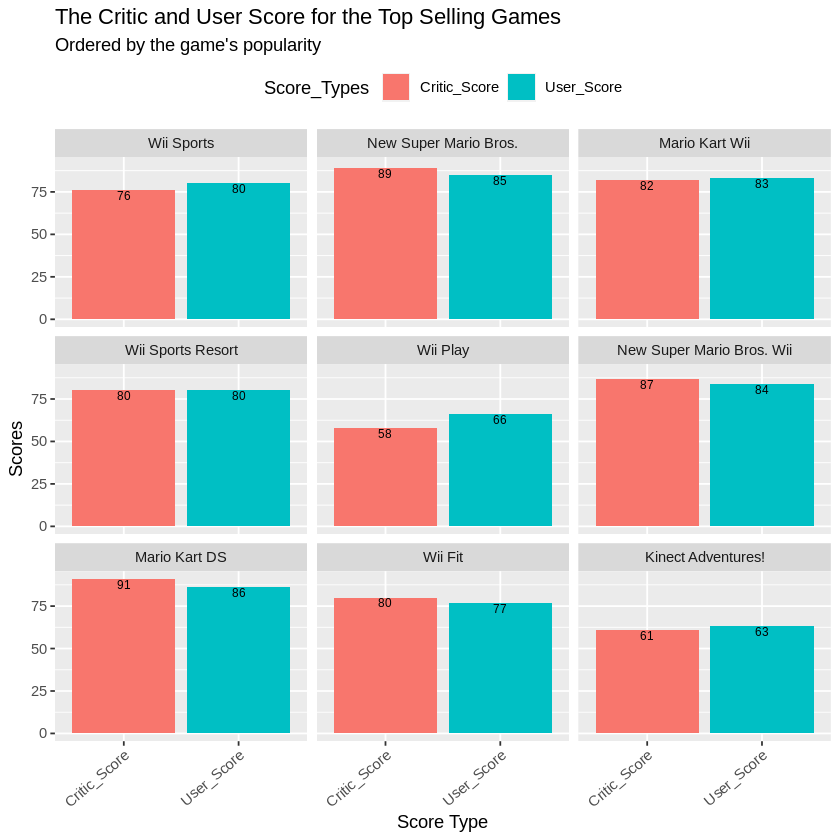

In [ ]:
topgames=subset (vgsales_ratings, vgsales_ratings$Global_Sales>21.8 & !(is.na(vgsales_ratings$Critic_Score))) 
topgames=topgames %>%
    select(Name, Critic_Score, User_Score)

p=c("Wii Sports", "New Super Mario Bros.", "Mario Kart Wii", "Wii Sports Resort",
    "Wii Play", "New Super Mario Bros. Wii",  "Mario Kart DS", "Wii Fit", 
    "Kinect Adventures!")

topgames = topgames %>%
  mutate(Name =  factor(Name, levels = p)) %>%
  arrange(Name)  

graph = topgames %>% 
  gather(Score_Types, Value, -Name) %>% 
  arrange(Name)

ggplot(graph, aes(x = Score_Types, y = Value, fill = Score_Types)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title="The Critic and User Score for the Top Selling Games",
         subtitle="Ordered by the game's popularity",
         x="Score Type", y="Scores")+   
    facet_wrap(~Name) +
    geom_text(aes(label=Value), vjust=1.1, color="black", size=2.5)+
    theme(axis.text.x = element_text(angle=40, hjust=1)) +
    theme(legend.position="top")

In [ ]:
lm(formula = Global_Sales ~ User_Score, data = vgsales_ratings)



Call:
lm(formula = Global_Sales ~ User_Score, data = vgsales_ratings)

Coefficients:
(Intercept)   User_Score  
   -0.04586      0.01108  


In [ ]:
lm(formula = Global_Sales ~ Critic_Score, data = vgsales_ratings)



Call:
lm(formula = Global_Sales ~ Critic_Score, data = vgsales_ratings)

Coefficients:
 (Intercept)  Critic_Score  
    -1.53343       0.03228  


Warning message:
“Removed 9525 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 9525 rows containing missing values (geom_point).”


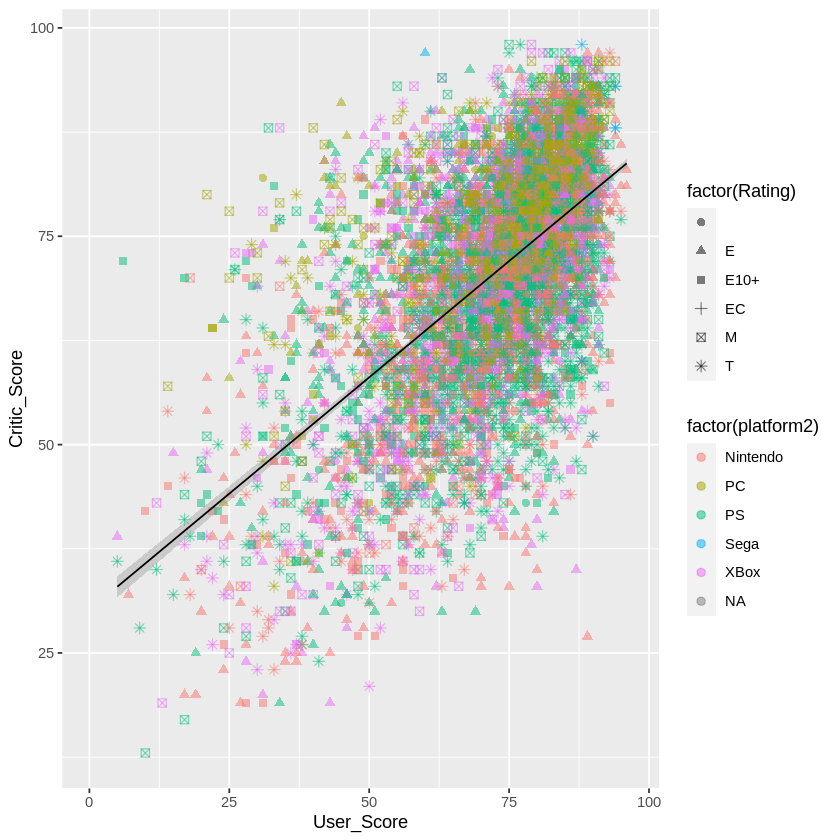

In [ ]:

ggplot(data=vgsales_ratings,aes(x=User_Score,y=Critic_Score)) +
 geom_point(aes(color=factor(platform2), shape=factor(Rating)),size=2,alpha=.5) + 
 geom_smooth(method = "lm", size=.5,color="black", formula = y ~ x) 

In [ ]:
lm(formula = Critic_Score ~ User_Score, data = vgsales_ratings)



Call:
lm(formula = Critic_Score ~ User_Score, data = vgsales_ratings)

Coefficients:
(Intercept)   User_Score  
    30.1657       0.5581  


Warning message:
“Removed 9525 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 9525 rows containing missing values (geom_point).”


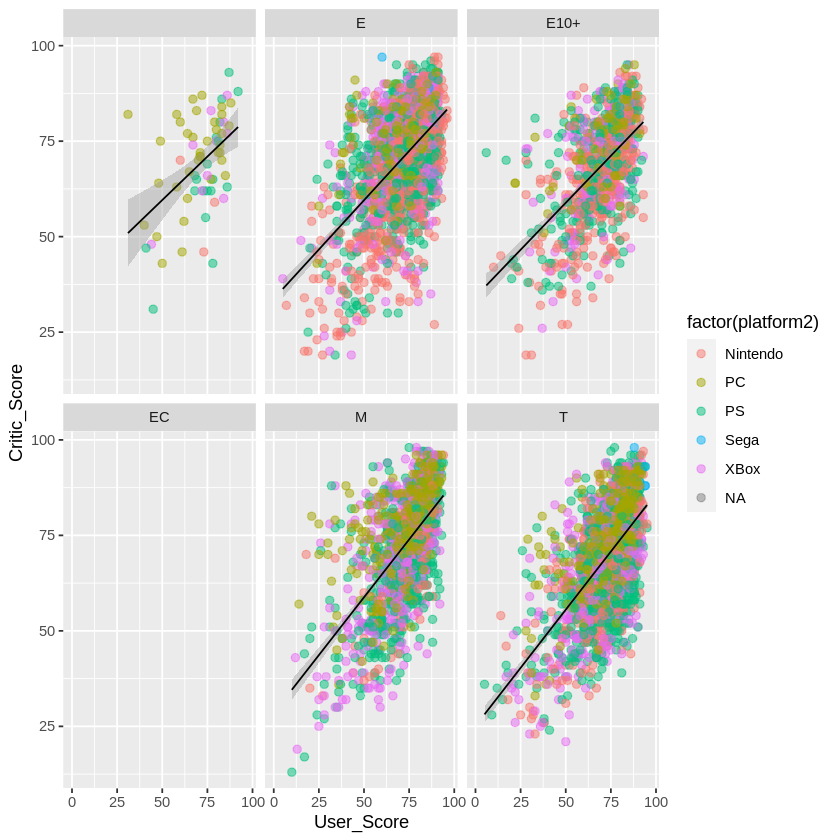

In [ ]:
ggplot(data=vgsales_ratings,aes(x=User_Score,y=Critic_Score)) +
 geom_point(aes(color=factor(platform2)),size=2,alpha=.5) +
 geom_smooth(method = "lm", size=.5,color="black", formula = y ~ x) +
  facet_wrap(~Rating)

In [ ]:
model<-lm(NA_Sales ~ Critic_Score + I(Critic_Score^2) + I(Critic_Score^3),vgsales_ratings)
model


Call:
lm(formula = NA_Sales ~ Critic_Score + I(Critic_Score^2) + I(Critic_Score^3), 
    data = vgsales_ratings)

Coefficients:
      (Intercept)       Critic_Score  I(Critic_Score^2)  I(Critic_Score^3)  
       -2.834e+00          1.857e-01         -3.647e-03          2.301e-05  


Warning message:
“Removed 8436 rows containing missing values (geom_point).”


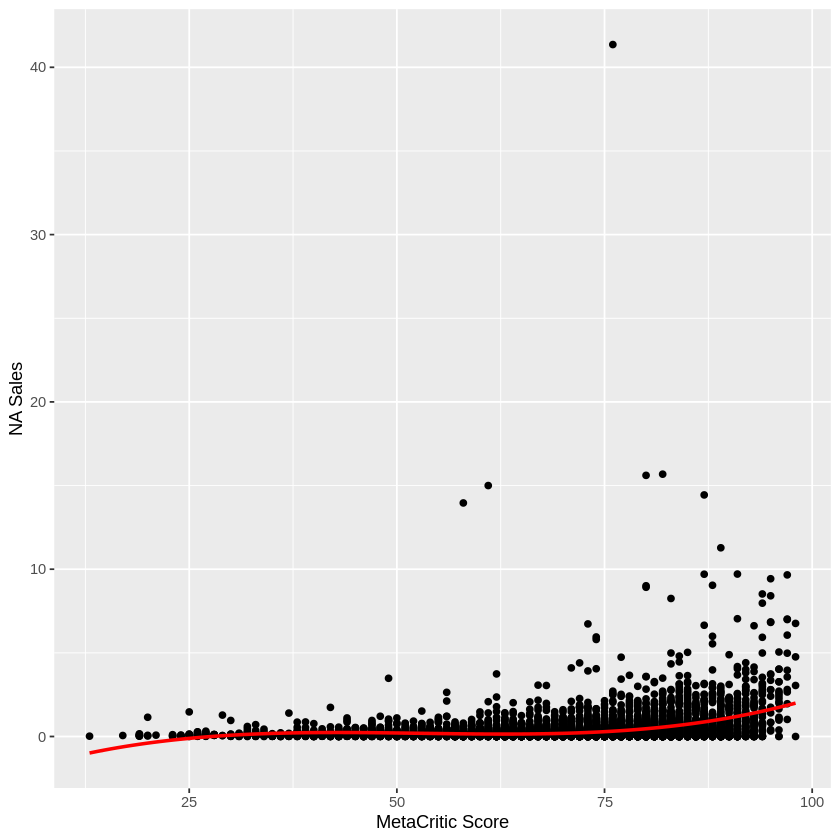

In [ ]:
testFunc <- function(x) {model$coefficients[1] + x*model$coefficients[2] + x*x*model$coefficients[3] + x*x*x*model$coefficients[4]}
ggplot(data=vgsales_ratings,aes(x=Critic_Score,y=NA_Sales)) + geom_point() + stat_function(fun=testFunc,color='red',size=1) + xlab("MetaCritic Score") + ylab('NA Sales')